<a href="https://colab.research.google.com/github/pachterlab/CBP_2021/blob/main/notebooks/ExInUteroE85/uteroPicassoAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Read in files from NCBI GEO
# !wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.MetaData.105.csv.gz
# !wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.normalized.assay105.csv.gz
# !wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_GSM5068636-GSM5068641_scRNA.integrated.scaled.assay105.csv.gz

!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_scRNA.MetaData.85.csv.gz
!wget --quiet https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149372/suppl/GSE149372_scRNA.normalized.assay85.csv.gz

#integrated.scaled.assay105

In [ ]:
#Get Map image coordinates
!wget --quiet https://caltech.box.com/shared/static/ljdowchhr9mgus19wplbls8yn6jmd4fk
!mv ljdowchhr9mgus19wplbls8yn6jmd4fk mapPoints.csv

In [ ]:
!gunzip *.gz

In [ ]:
!git clone https://github.com/hhcho/densvis.git

Cloning into 'densvis'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 145 (delta 78), reused 100 (delta 45), pack-reused 0
Receiving objects: 100% (145/145), 410.98 KiB | 4.33 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
%cd /content/densvis/densne/

/content/densvis/densne


In [ ]:
!g++ sptree.cpp densne.cpp densne_main.cpp -o den_sne -O2
import densne

densne.cpp: In function ‘bool DENSNE::load_data(double**, int*, int*, int*, double*, double*, int*, int*, double*, double*, bool*, double**)’:
densne.cpp:961:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(n, sizeof(int), 1, h);                                            // number of datapoints
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:962:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(d, sizeof(int), 1, h);                                            // original dimensionality
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~
densne.cpp:963:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(theta, sizeof(double), 1, h);                                        // gradient accuracy
   ~~~~~^~~~~~~~~~

In [ ]:
%cd /content/

/content


In [ ]:
!git clone https://github.com/pachterlab/CBP_2021.git

Cloning into 'spacetime'...
remote: Enumerating objects: 1562, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 1562 (delta 59), reused 50 (delta 27), pack-reused 1474
Receiving objects: 100% (1562/1562), 218.22 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (1041/1041), done.


In [ ]:
%cd /content/CBP_2021/scripts

/content/spacetime/nnNCApy


In [ ]:
!pip3 install --quiet torch
!pip3 install --quiet anndata
!pip3 install --quiet matplotlib
!pip3 install --quiet scikit-learn
!pip3 install --quiet torchsummary
!pip install --quiet scanpy==1.6.0
!pip3 install --quiet umap-learn

     |████████████████████████████████| 127 kB 5.5 MB/s 
     |████████████████████████████████| 7.7 MB 6.6 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 1.1 MB 26.1 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 


## **Install Packages**

In [ ]:
import anndata 
import pandas as pd
import numpy as np
from MCML import mcml #Now has continuous label addition
from Picasso import picasso
import visualizations as vis
import tools as tl
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.neighbors import NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
import torch
import time
import scanpy as sc
import seaborn as sns
import umap
from scipy import stats
import scipy.io as sio
import matplotlib
matplotlib.rc('axes',edgecolor='black')
%matplotlib inline
sc.set_figure_params(dpi=125)
sns.set_style('white')

## **Import Data**

In [ ]:
# General parameters
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.1

state = 42
ndims = 2

data_path = '/content'

n_latent = 50
pcs = 50
pcs2 = 15

In [ ]:
cell_types = {'0': 'Blood', '1': 'Mixed Mesoderm', '2': 'Foregut', '3': 'Cardiac', '4': 'Mid Hind Brain',
'5': 'Endothelial', '6': 'Presomitic Mesoderm', '7':'Amnion', '8':'Extra-Embryonic Endoderm', '9':'Pharyngeal Mesoderm',
'10': 'Extra-Embryonic Ectoderm', '11': 'Blood' , '12':'Placodes', '13': 'Neural Tube', '14':'Extra-Embryonic Mesoderm',
'15':'Somitic Mesoderm', '16':'Neural Crest', '17':'Amnion', '18':'Mid Hind Gut'}

In [ ]:
counts = pd.read_csv(data_path+'/GSE149372_scRNA.normalized.assay85.csv',index_col=0)
print(counts.head())

cellMeta = pd.read_csv(data_path+'/GSE149372_scRNA.MetaData.85.csv')
print(cellMeta.head())

        AAACGAAAGTCCCGAC-1  ...  TTTGTTGGTTGCGGAA-4
Xkr4              0.000000  ...                 0.0
Rp1               0.000000  ...                 0.0
Sox17             0.000000  ...                 0.0
Mrpl15            1.175618  ...                 0.0
Lypla1            0.751450  ...                 0.0

[5 rows x 10290 columns]
           Unnamed: 0 orig.ident  ...  seurat_clusters  integrated_snn_res.0.5
0  AAACGAAAGTCCCGAC-1       p8.5  ...               13                      13
1  AAACGAAGTCGAGTTT-1       p8.5  ...               15                      15
2  AAACGCTAGGACTTCT-1       p8.5  ...               10                      10
3  AAACGCTCAACGCCCA-1       p8.5  ...               12                      12
4  AAACGCTTCTGTGCGG-1       p8.5  ...                8                       8

[5 rows x 9 columns]


In [ ]:
#Center and scale log-normalized data
count_mat = counts.values.T

In [ ]:
adata = anndata.AnnData(X = count_mat)
adata.obs_names = list(counts.columns)
adata.var_names = list(counts.index)
adata.obs['Utero'] = pd.Categorical(cellMeta.Utero)
adata.obs['Cluster'] = pd.Categorical(cellMeta.seurat_clusters)
adata

AnnData object with n_obs × n_vars = 10290 × 19588
    obs: 'Utero', 'Cluster'

In [ ]:
exAdata = adata[adata.obs['Utero']=='ExUt']
inAdata = adata[adata.obs['Utero']=='InUt']
exAdata

View of AnnData object with n_obs × n_vars = 6205 × 19588
    obs: 'Utero', 'Cluster'

In [ ]:
#In paper, use top 2000 HVGs and 15 PCs
def scaleAdata(adata):
  sc.pp.filter_cells(adata, min_counts=0)
  sc.pp.filter_genes(adata, min_counts=0)


  sc.pp.highly_variable_genes(adata,n_top_genes=2000)

  adata = adata[:,adata.var['highly_variable']]
  adata.obsm['log'] = adata.X

  sc.pp.scale(adata, max_value=10)
  return adata

In [ ]:
adata = scaleAdata(adata)
exAdata = scaleAdata(exAdata)
inAdata = scaleAdata(inAdata)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [ ]:
toUseAdata = inAdata
count_mat = toUseAdata.obsm['log']
scaled_mat = toUseAdata.X

In [ ]:
#Set colors for cell clusters
colors = np.random.rand(len(toUseAdata.obs['Cluster']),3)

labs = np.array([list(toUseAdata.obs['Cluster']),list(toUseAdata.obs['Utero'])])

# adata.obs['Cluster'].value_counts()

In [ ]:
def getAllVars(latents,latentLab,latentType):
  emb = []

  vals = []

  dist = []

  dim = []

  allVals = pd.DataFrame()

  for p in range(len(latents)):

    i = latents[p]
    l = latentLab[p]
    d = latentType[p]

    c = tl.getCentroidDists(i, labs[0])

    intraC = tl.getIntraVar(i, labs[0],labs[0])
  
    vals += [stats.pearsonr(c, amb)[0], stats.pearsonr(intraC, ambIntraC)[0]]
  
    dist += ['Inter-Type','Intra-Type'] 

    emb += [l]*2
    dim += [d]*2


  allVals['Latent'] = emb
  allVals['Distance'] = dist
  allVals['Pearsonr'] = vals
  allVals['Dimension'] = dim


  return allVals


In [ ]:
#Get fraction of k-nearest neighbors that are the same as in the ambient space
def getAllKNNs(orig_indices,latents,latentLab,latentType):
  emb = []

  frac = []


  knnDF = pd.DataFrame()

  for p in range(len(latents)):
    i = latents[p]
    l = latentLab[p]

    ind = tl.getNeighbors(i, n_neigh = 10,p=1)

    frac += [np.mean(tl.getIntersect(orig_indices,ind))]



    emb += [l]


  knnDF['Fraction'] = frac
  knnDF['Latent'] = emb

  return knnDF

### **Boundary MCML**

In [ ]:
rounds = 5

In [ ]:
batch_size = 128 #scaled_mat.shape[0]#len(adata.obs_names)
#Make a (unit) circle 
#r = 1
theta = np.linspace(0, 2*np.pi, batch_size)
# #Turkey guy
# x, y = (np.sin(2**theta) - 1.7) * np.cos(theta), (np.sin(2**theta) - 1.7) * np.sin(theta)

# #Butterfly r = 4*cos(4cosθ))
# x, y = (2*np.cos(4*np.cos(theta))) * np.cos(theta), (2*np.cos(4*np.cos(theta))) * np.sin(theta)

# # Spiral
#x, y = (1/2)*theta * np.cos(theta), (1/2)*theta * np.sin(theta)

# #Quasi-rose
x, y = (4 + np.cos(6*theta)) * np.cos(theta), (4 + np.cos(6*theta)) * np.sin(theta)


#Make array input for dimension of shape 
coords = np.array([list(x),list(y)])

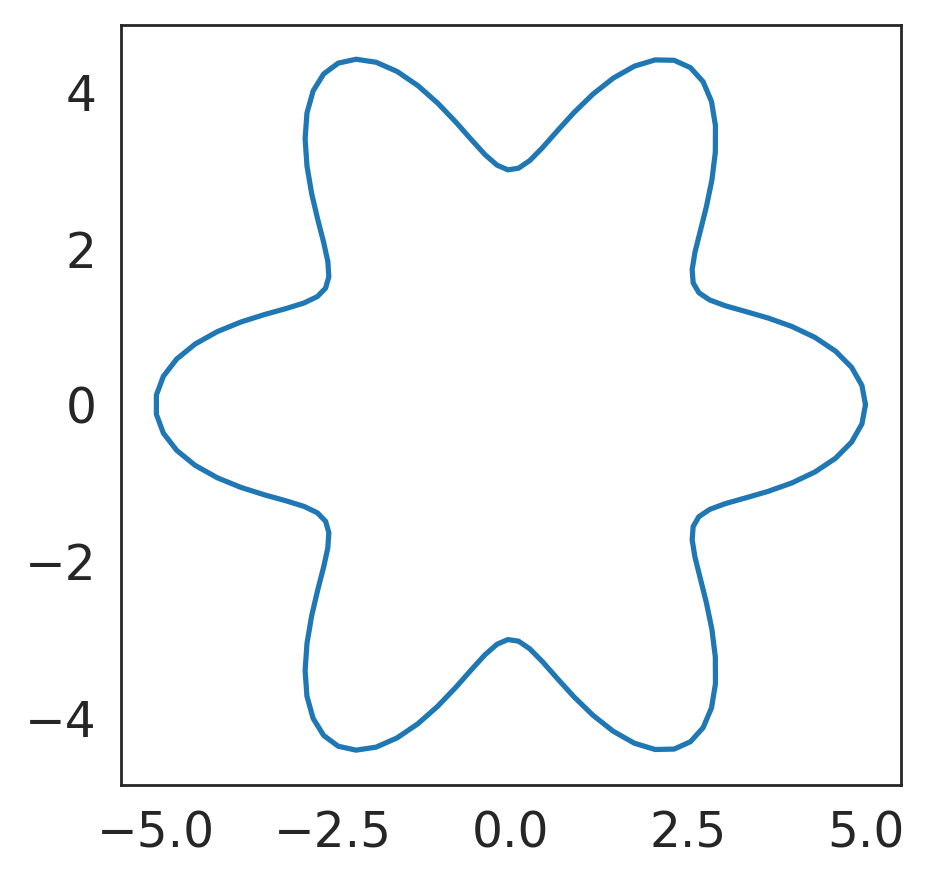

In [ ]:
plt.plot(x,y)

**Test with task assignment for In Utero data**

Set Ambient Data

In [ ]:
toUseAdata = inAdata  #Change to exData as well
count_mat = toUseAdata.obsm['log']
scaled_mat = toUseAdata.X

#Set colors for cell clusters
colors = np.random.rand(len(toUseAdata.obs['Cluster']),3)

labs = np.array([list(toUseAdata.obs['Cluster']),list(toUseAdata.obs['Utero'])])

In [ ]:
fullNames = [cell_types[str(i)] for i in labs[0]]

In [ ]:
amb = tl.getCentroidDists(count_mat,labs[0])
ambIntraC = tl.getIntraVar(count_mat, labs[0], labs[0])

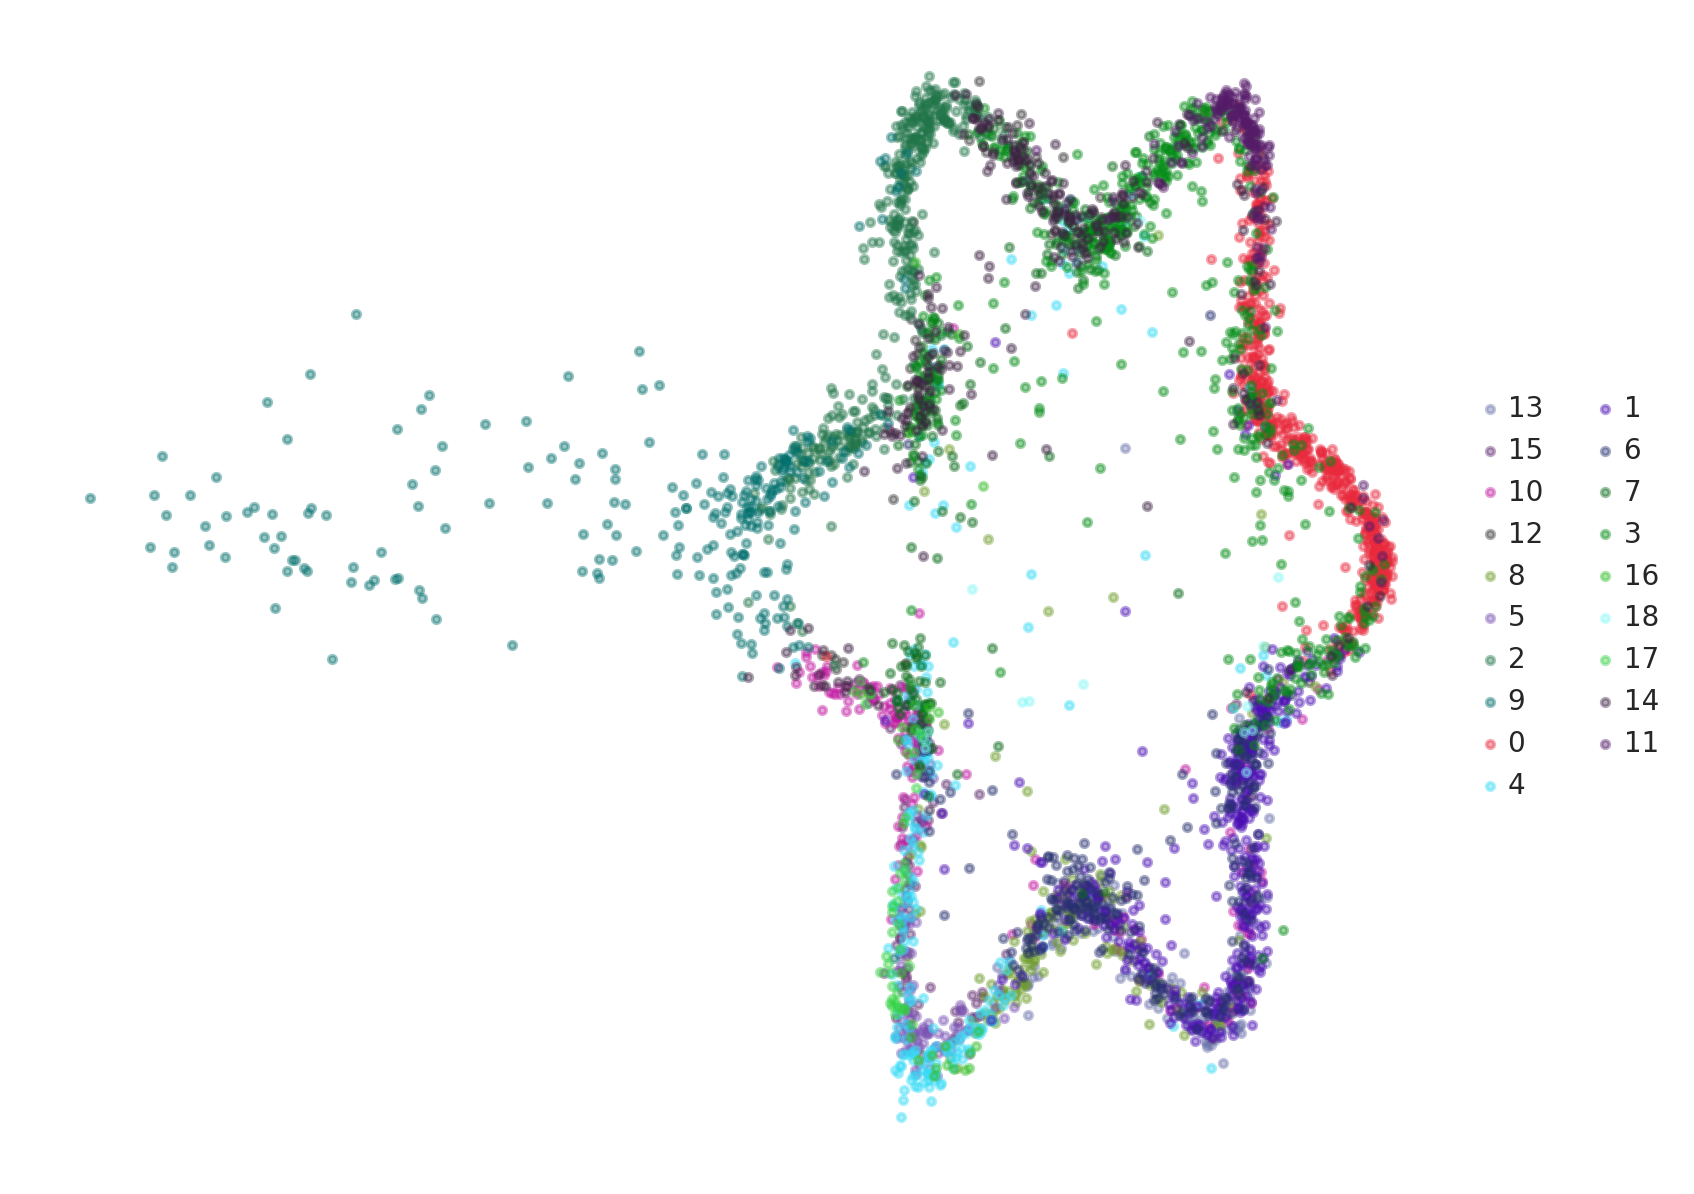

In [ ]:
#In utero
fl = []
flLab = []
flType = []

for i in range(rounds):
  nca = picasso(n_latent = 2, epochs = 1000, batch_size = batch_size)
  lossesB, latentB = nca.fit(scaled_mat,coords, fracNCA = .05,silent=True,ret_loss=True)  #.06 for ex utero

  fl += [latentB]
  flLab += ['Flower']
  flType += ['MCML 2D']


vis.obj_plot_embed(latentB, fullNames, fname = '2DNCA.pdf', colors=colors )


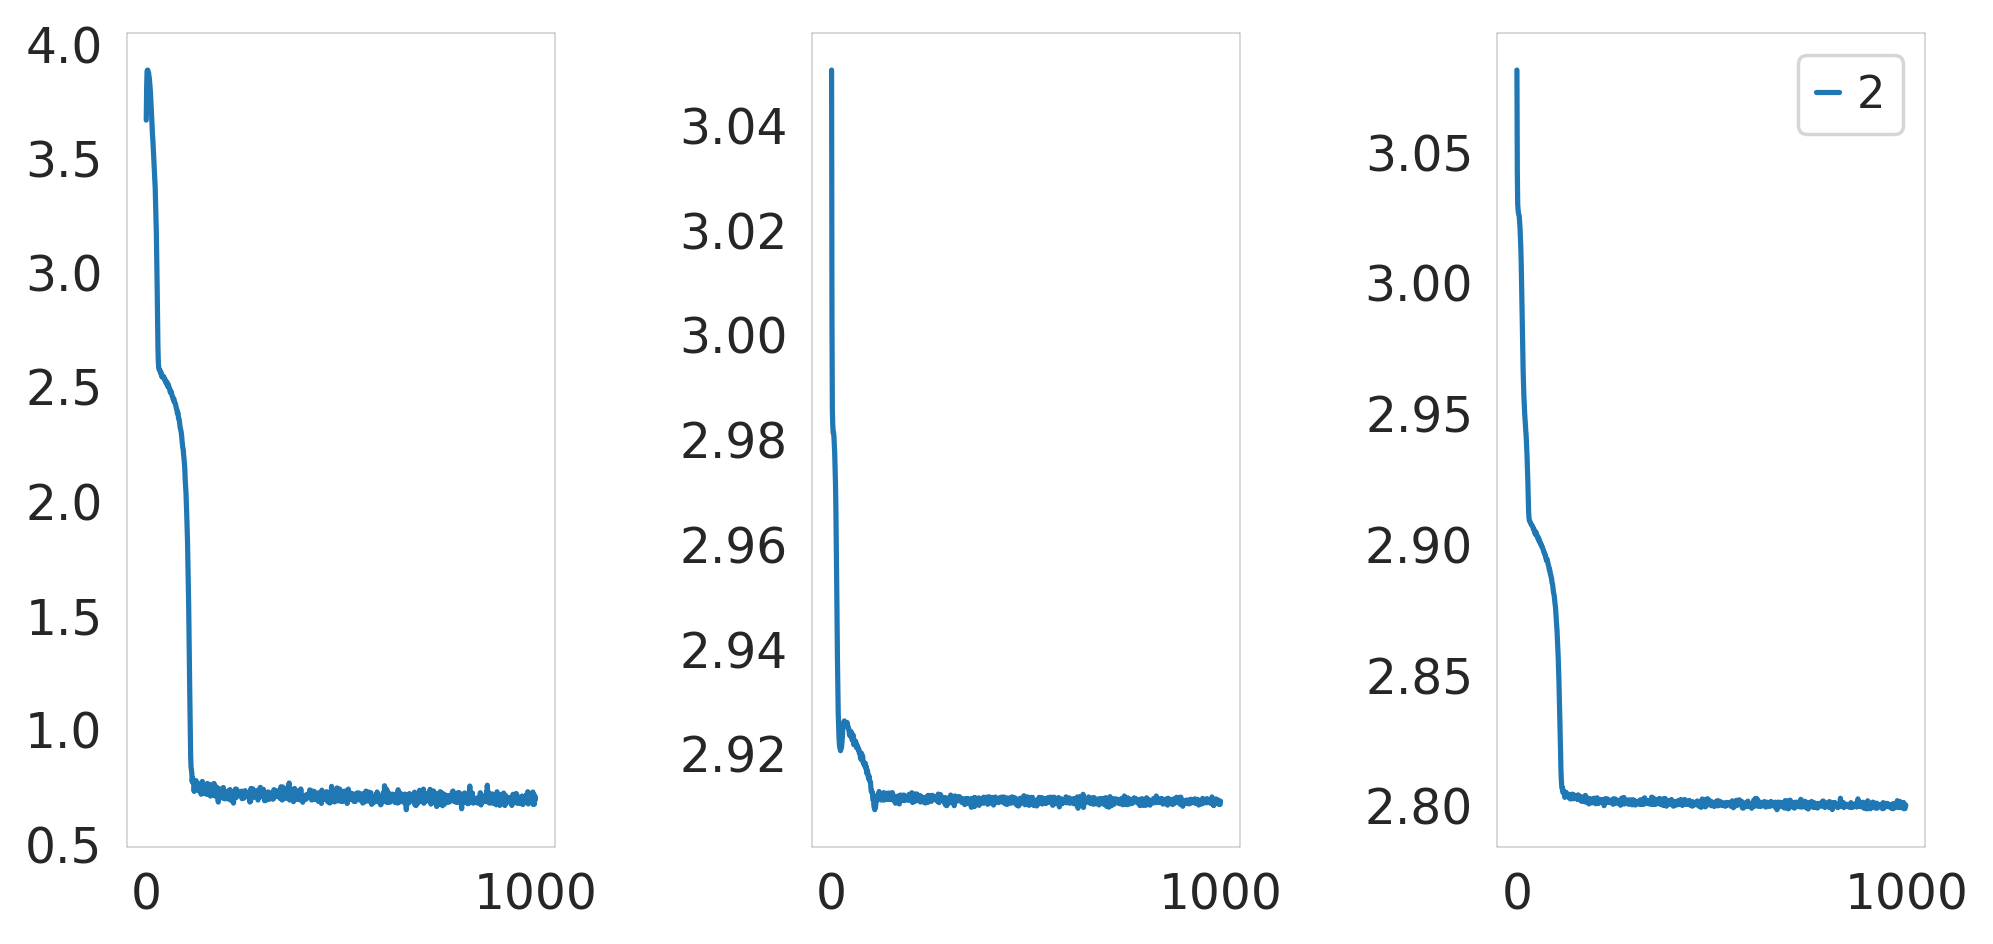

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(8,4))
for i in range(lossesB.shape[1]):
  axs[i].plot(lossesB[:,i],label=str(i))
  
plt.legend()
plt.tight_layout()
plt.show()

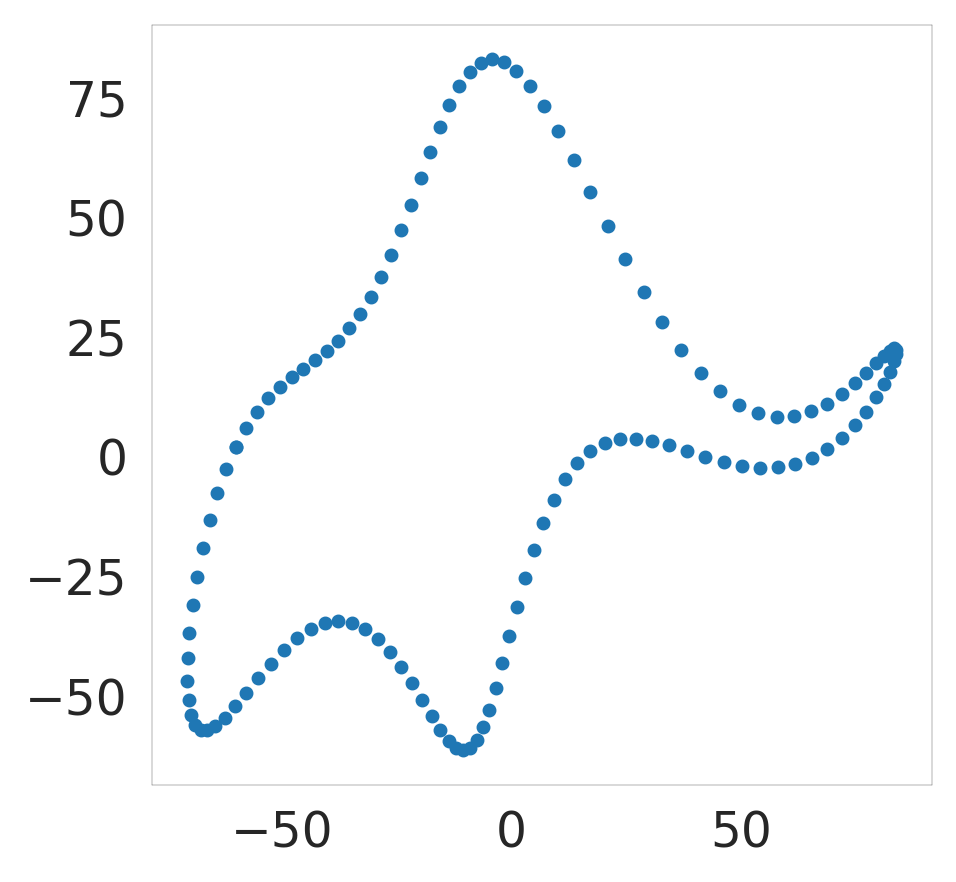

In [ ]:
# elephant parameters
batch_size = 128 #scaled_mat.shape[0]#3850 # 50

p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    # x = np.append(fourier(t,Cx), [-p5.imag]) #[-p5.imag]
    # y = np.append(fourier(t,Cy), [p5.imag]) #[p5.imag]
    x = fourier(t,Cx)
    y = fourier(t,Cy)

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,batch_size), p1, p2, p3, p4, p5)

#Make array input for dimension of shape 

y = y#0.04*y #.025  .025    .025
x = x#0.02*x #.015   .02     .015
# y = 0.02*y  
# x = 0.01*x

coords = np.array([list(y),list(-x)])

plt.plot(y,-x,'.')
plt.show()


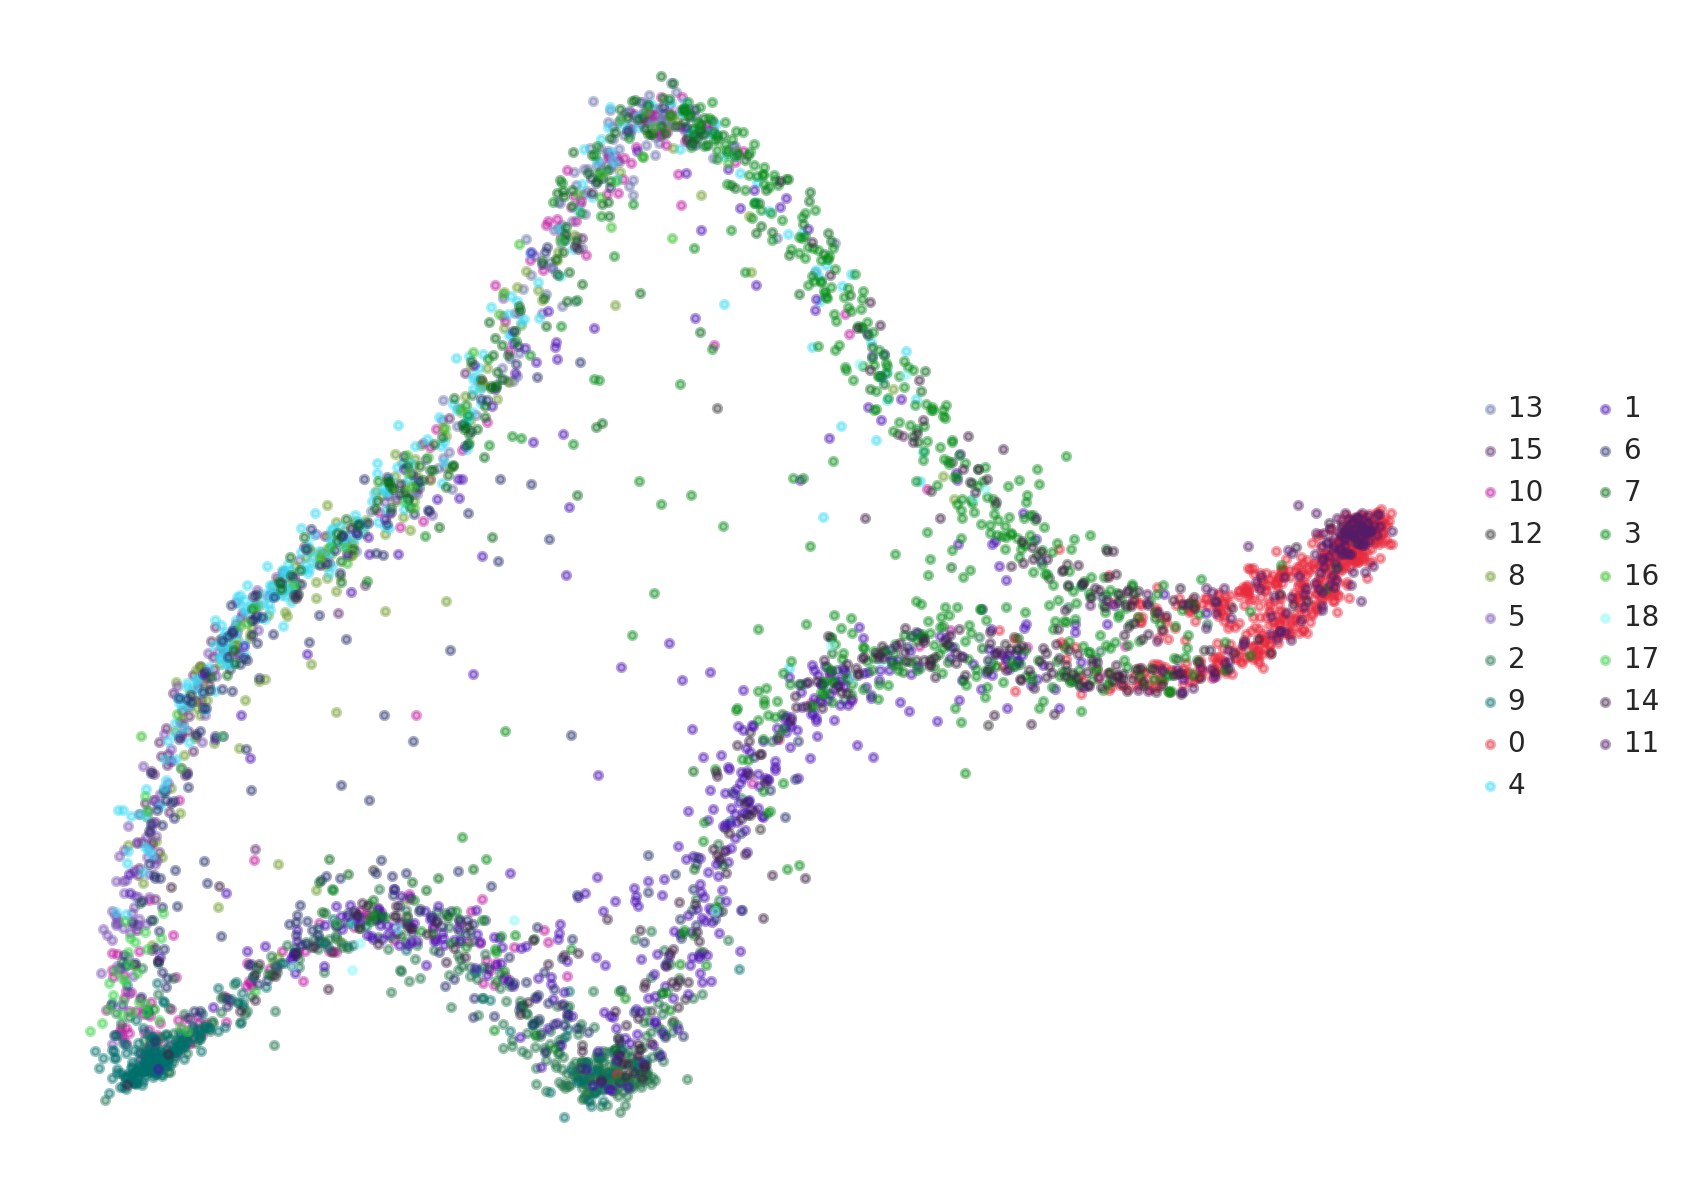

In [ ]:
#Test with task assignment in-utero
el = []
elLab = []
elType = []

for i in range(rounds):
  nca = picasso(n_latent = 2, epochs = 1000, batch_size = batch_size)
  lossesEl, latentEl = nca.fit(scaled_mat,coords, fracNCA = 0.035,silent=True,ret_loss=True) #.06

  el += [latentEl]
  elLab += ['Elephant']
  elType += ['MCML 2D']


vis.obj_plot_embed(latentEl, fullNames, fname = '2DNCA.pdf', colors=colors )


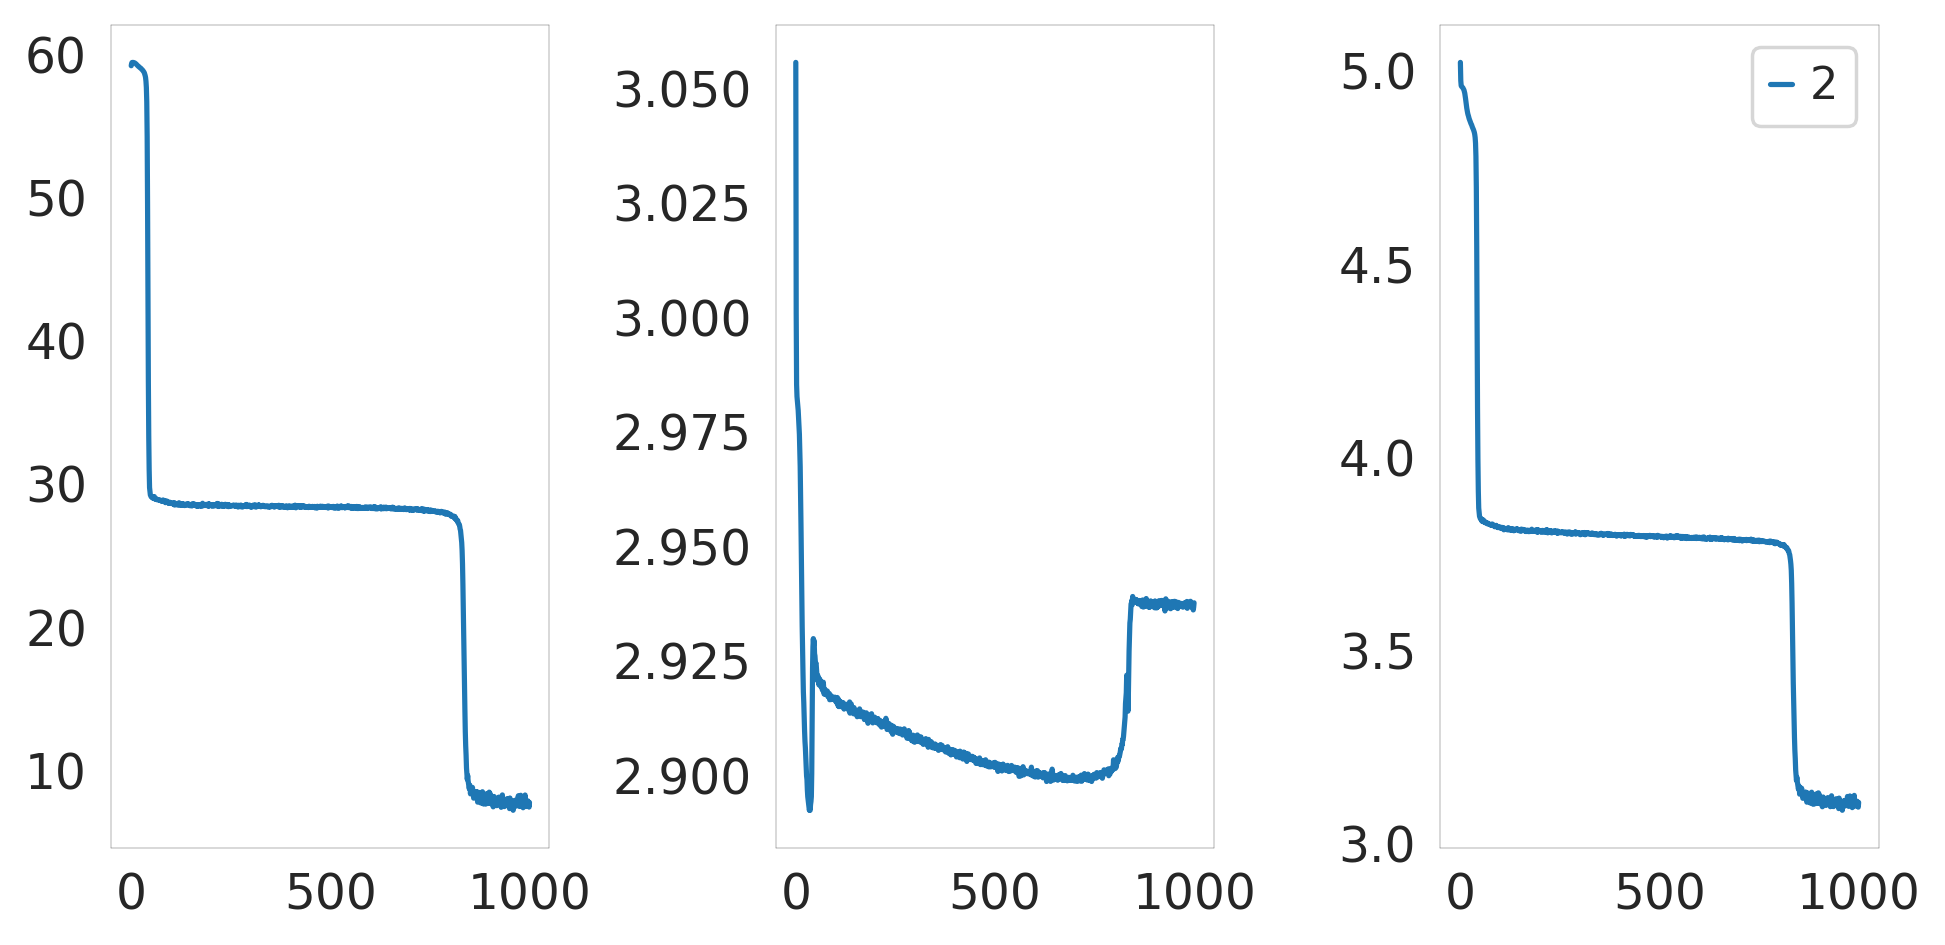

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(8,4))
for i in range(lossesEl.shape[1]):
  axs[i].plot(lossesEl[:,i],label=str(i))
  
plt.legend()
plt.tight_layout()
plt.show()

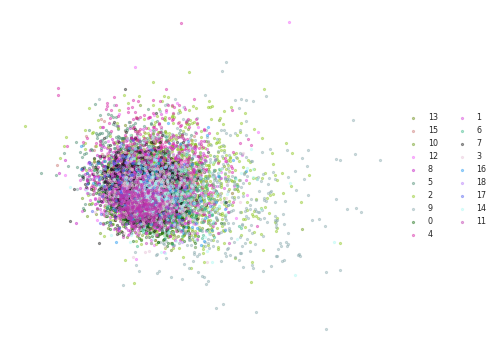

In [ ]:
# #No training
# ncaNoT = picasso(n_latent = 2, epochs = 0, batch_size = batch_size)
# lossesNoT, latentNoT = ncaNoT.fit(scaled_mat,coords, fracNCA = 1,silent=True,ret_loss=True)


# vis.obj_plot_embed(latentNoT, labs[0], fname = '2DNCA.pdf', colors=colors )


Get latent spaces for comparison (baselines)

In [ ]:
latents,latentLab,latentType = tl.visComp(scaled_mat, ndims=2, pcs=50)

Compare flower embedding

In [ ]:
latents = fl + latents

latentLab = flLab + latentLab

latentType = flType + latentType

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

In [ ]:
vis.plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10)

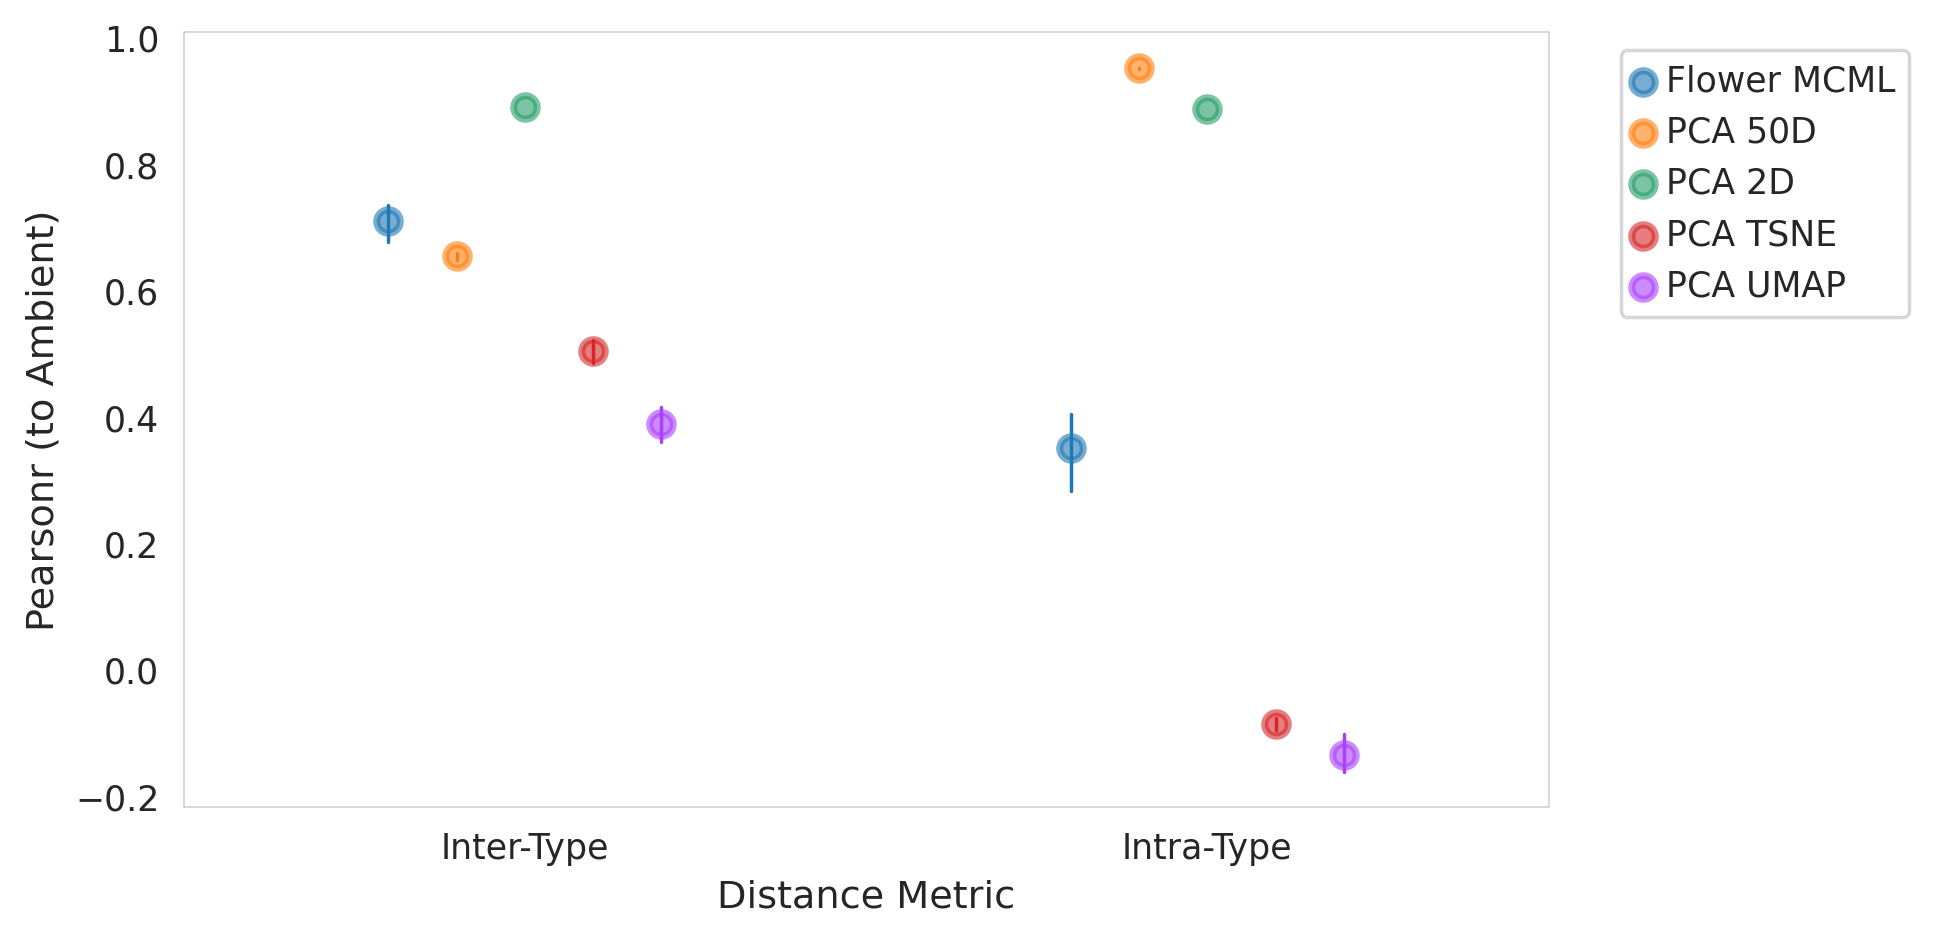

In [ ]:
vis.plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10)

Compare elephant embedding

In [ ]:
latents = el + latents

latentLab = elLab + latentLab

latentType = elType + latentType

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)
allVals = allVals[~allVals['Latent'].isin(['Flower'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

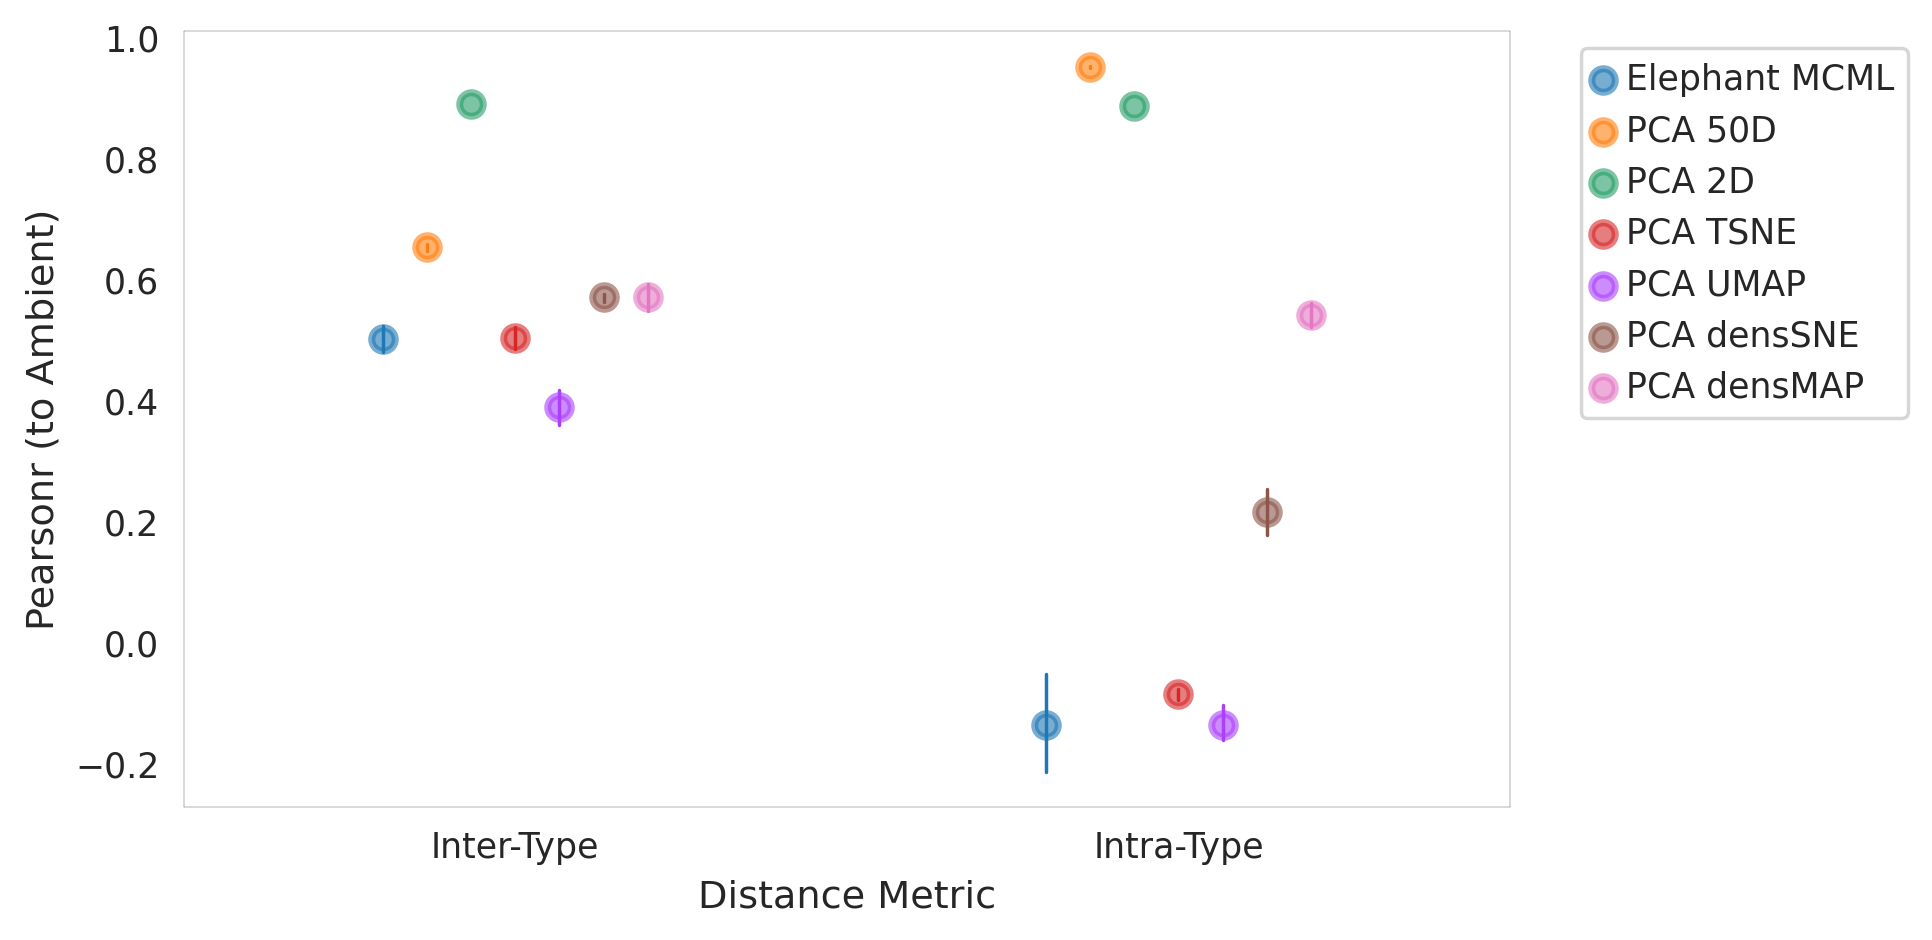

In [ ]:
vis.plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10)

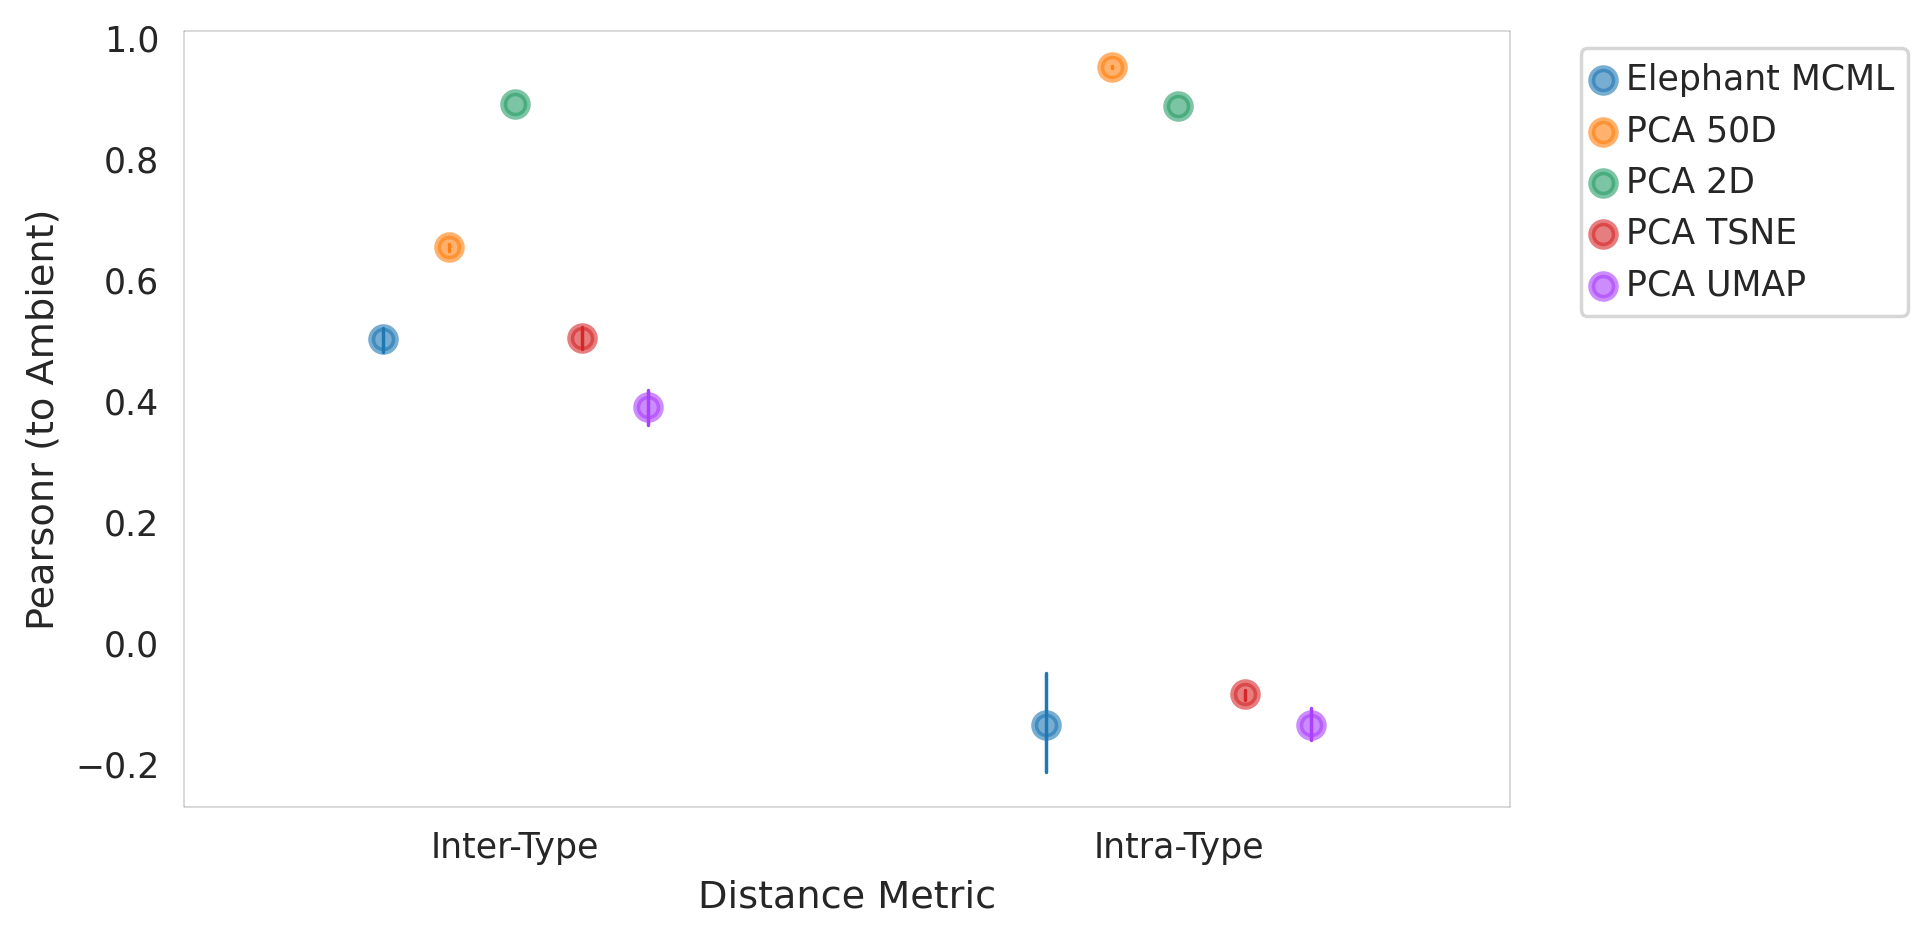

In [ ]:
vis.plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10)

**Test Ex-Utero Data**

Set Ambient Data

In [ ]:
toUseAdata = exAdata  #Change to exData as well
count_mat = toUseAdata.obsm['log']
scaled_mat = toUseAdata.X

#Set colors for cell clusters (Use same colors as in utero data)
#colors = np.random.rand(len(toUseAdata.obs['Cluster']),3)

labs = np.array([list(toUseAdata.obs['Cluster']),list(toUseAdata.obs['Utero'])])

In [ ]:
fullNames = [cell_types[str(i)] for i in labs[0]]

In [ ]:
amb = tl.getCentroidDists(count_mat,labs[0])
ambIntraC = tl.getIntraVar(count_mat, labs[0], labs[0])

In [ ]:
batch_size = 128 #scaled_mat.shape[0]#len(adata.obs_names)
#Make a (unit) circle 
#r = 1
theta = np.linspace(0, 2*np.pi, batch_size)
# #Turkey guy
# x, y = (np.sin(2**theta) - 1.7) * np.cos(theta), (np.sin(2**theta) - 1.7) * np.sin(theta)

# #Butterfly r = 4*cos(4cosθ))
# x, y = (2*np.cos(4*np.cos(theta))) * np.cos(theta), (2*np.cos(4*np.cos(theta))) * np.sin(theta)

# # Spiral
#x, y = (1/2)*theta * np.cos(theta), (1/2)*theta * np.sin(theta)

# #Quasi-rose
x, y = (4 + np.cos(6*theta)) * np.cos(theta), (4 + np.cos(6*theta)) * np.sin(theta)


#Make array input for dimension of shape 
coords = np.array([list(x),list(y)])

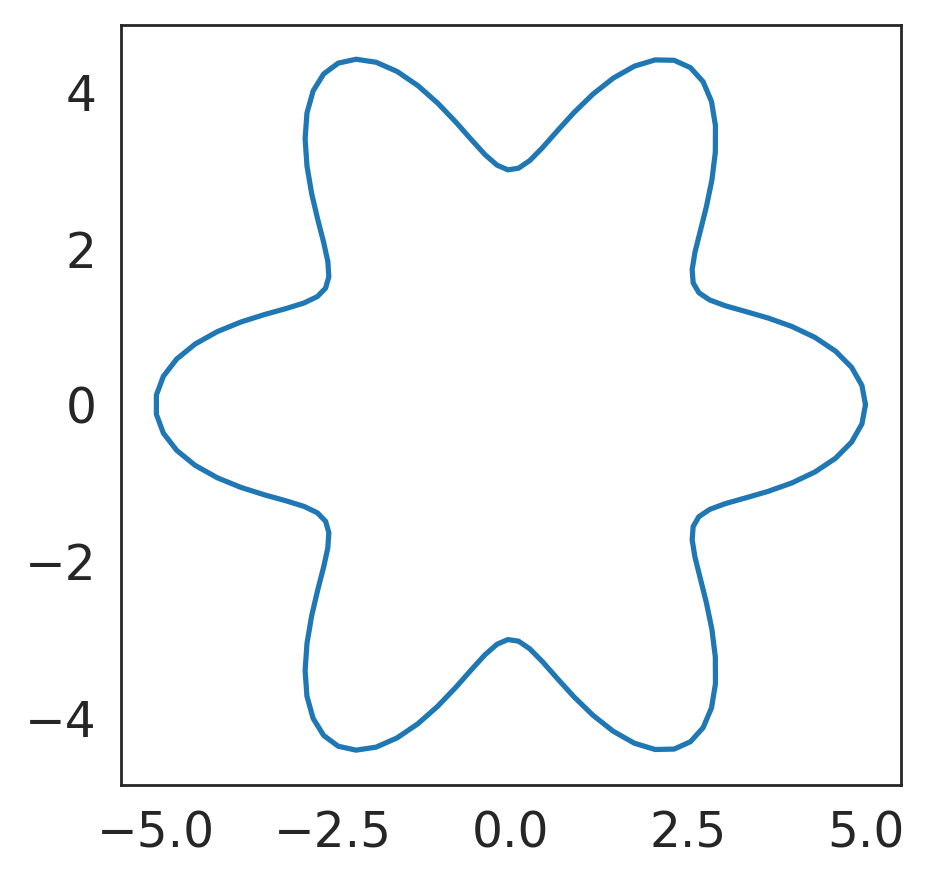

In [ ]:
plt.plot(x,y)

In [ ]:
#Ex utero ***** RERUN  FLOWER******** 
fl = []
flLab = []
flType = []

for i in range(rounds):
  nca = picasso(n_latent = 2, epochs = 1000, batch_size = batch_size)
  lossesB, latentB = nca.fit(scaled_mat,coords, fracNCA = .06,silent=True,ret_loss=True)  #.06 for ex utero

  fl += [latentB]
  flLab += ['Flower']
  flType += ['MCML 2D']





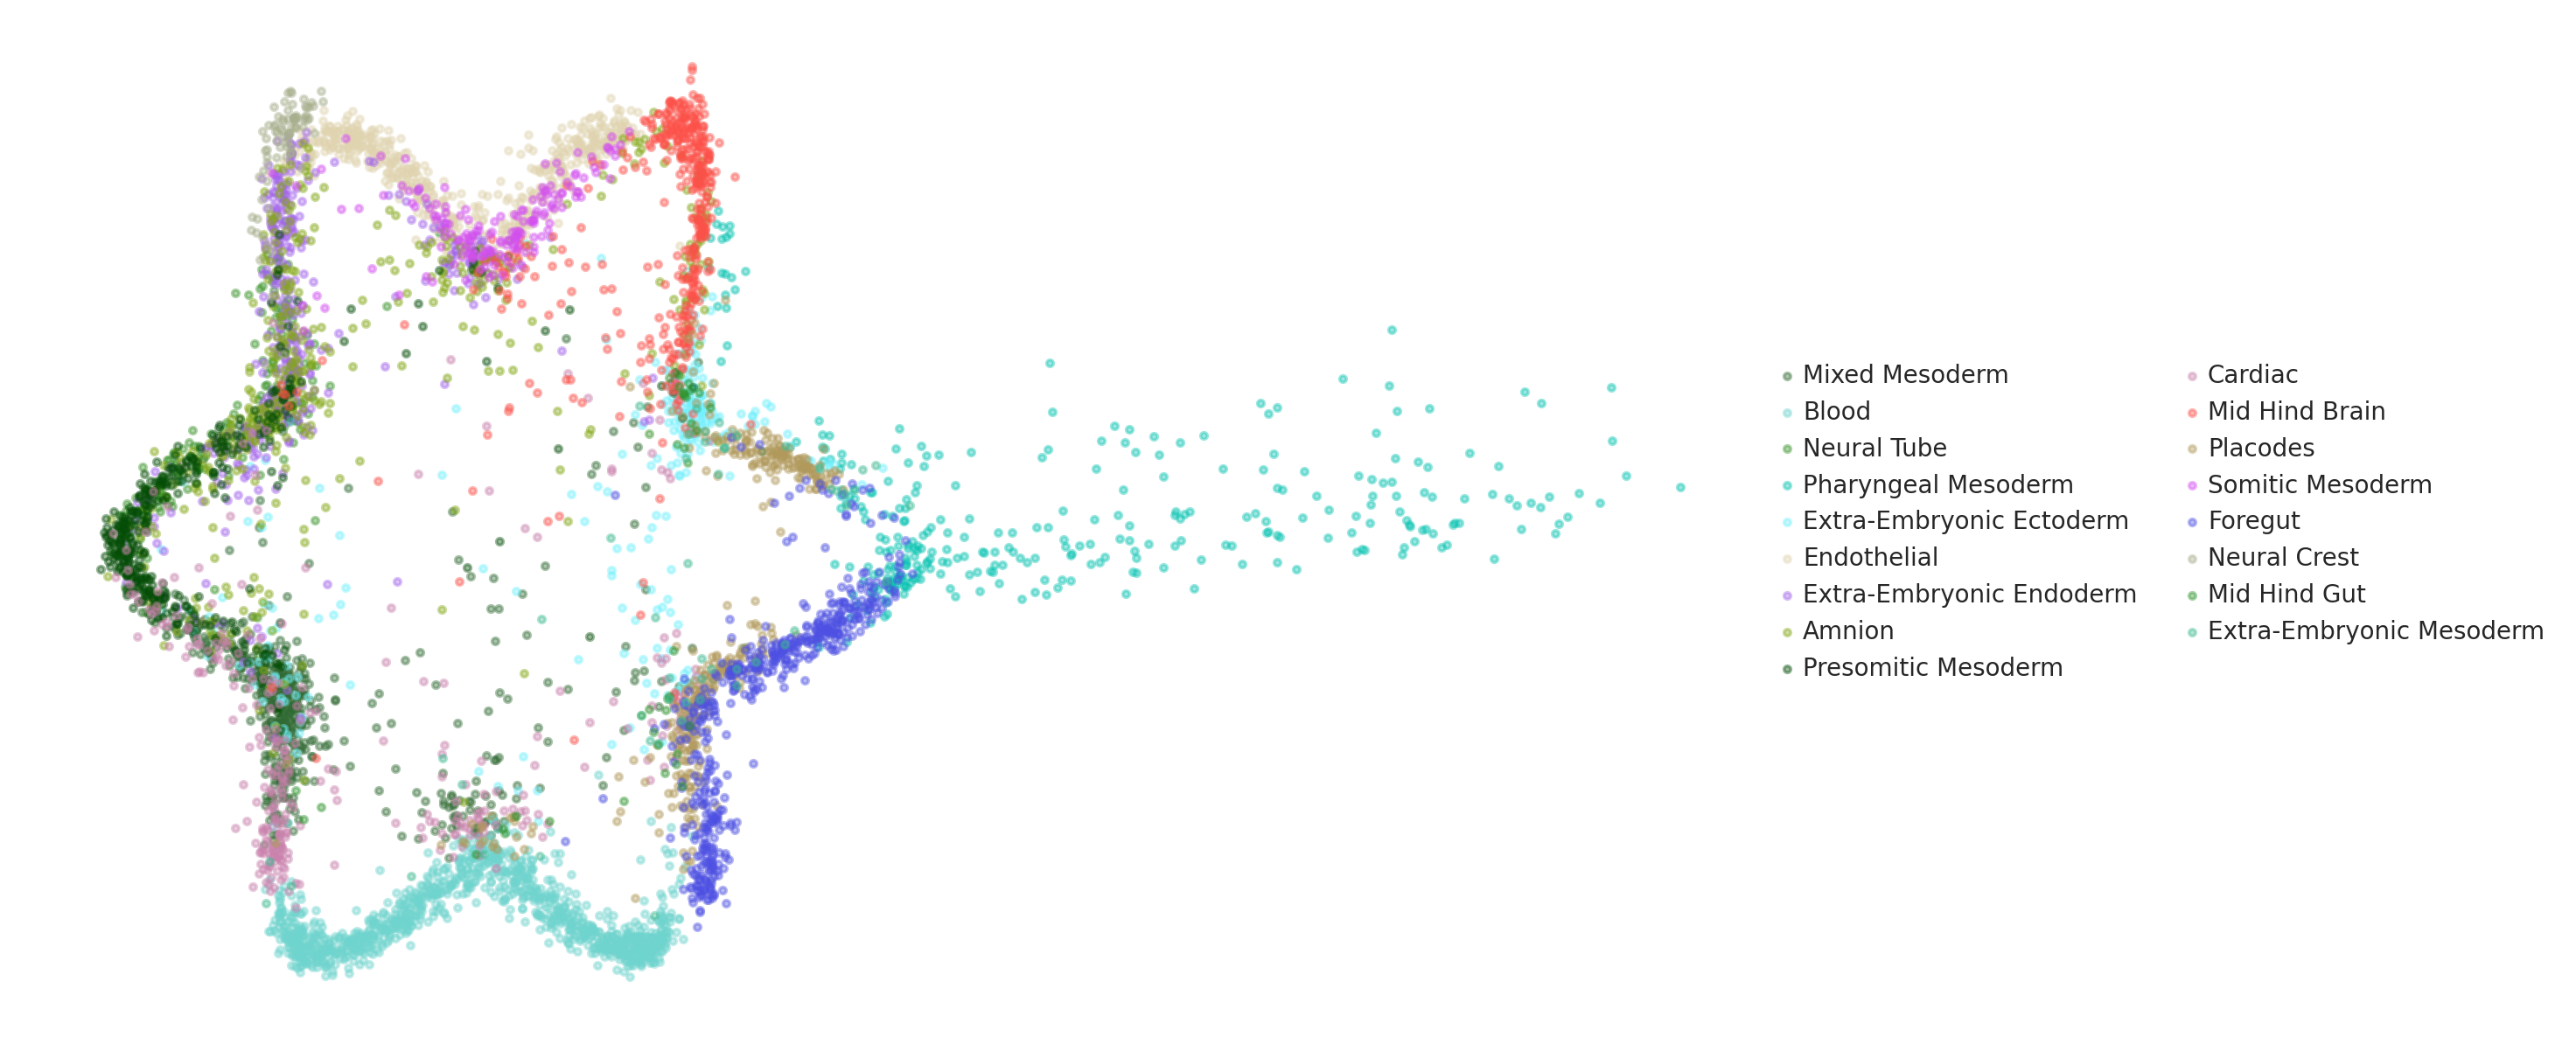

In [ ]:
vis.obj_plot_embed(latentB, np.array(fullNames), fname = '2DNCA.pdf', colors=colors ,figsize=(12,5))

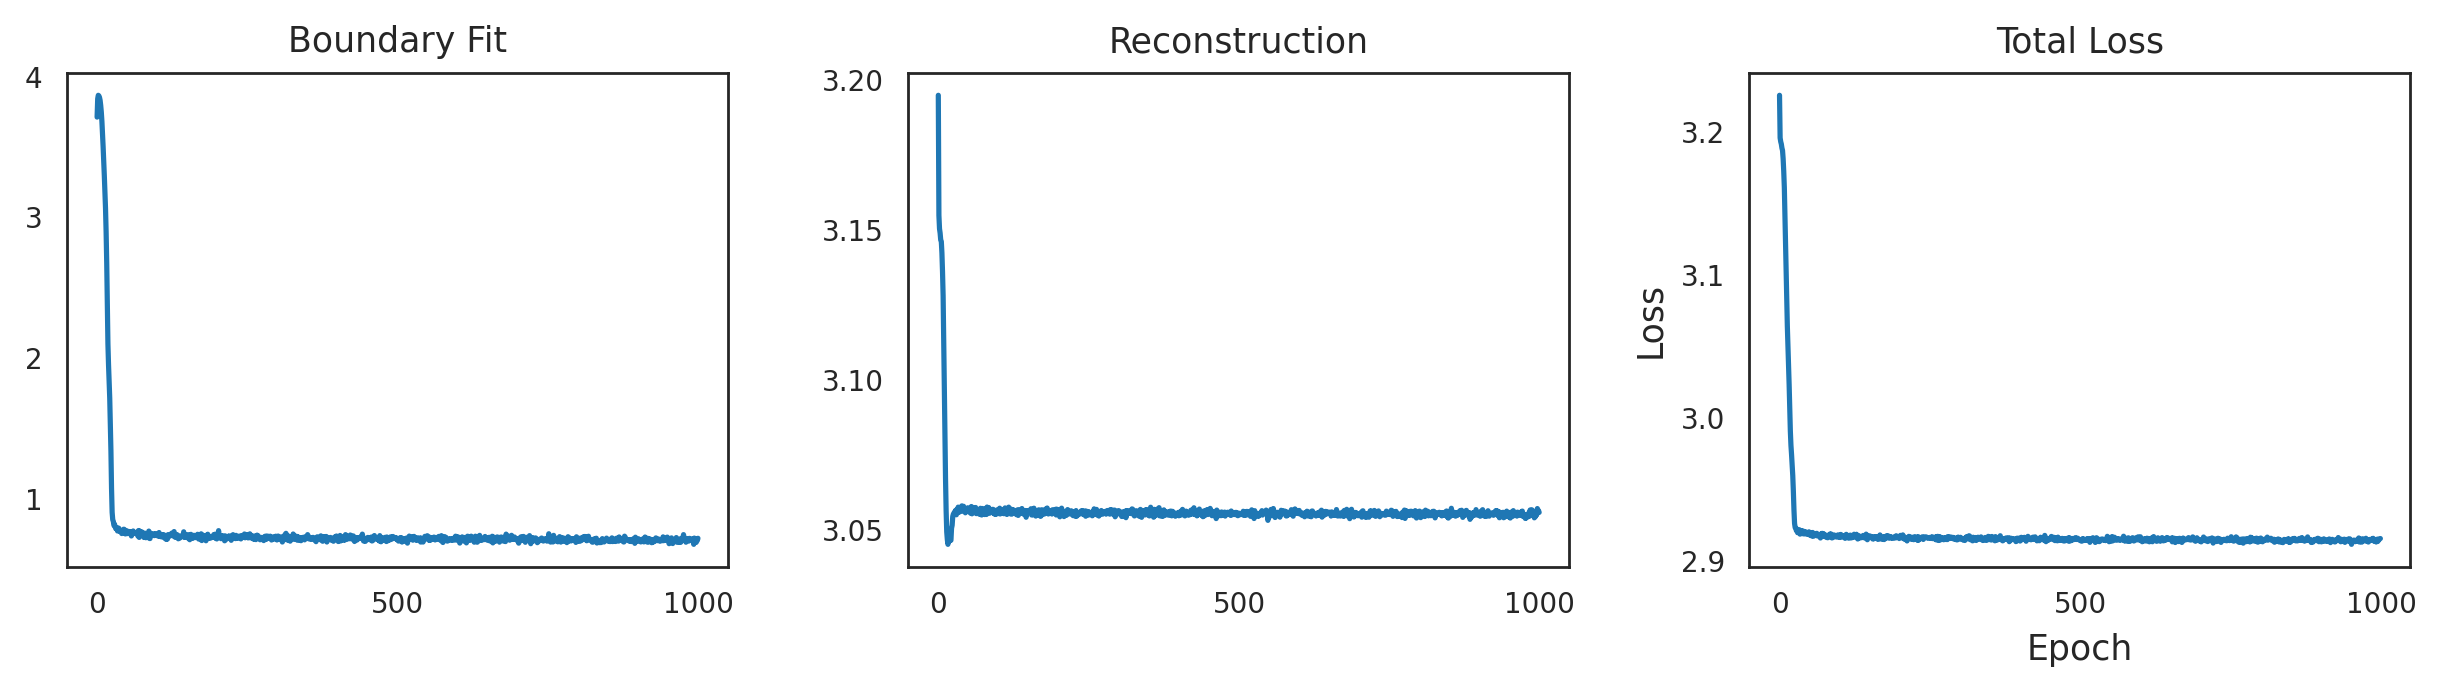

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

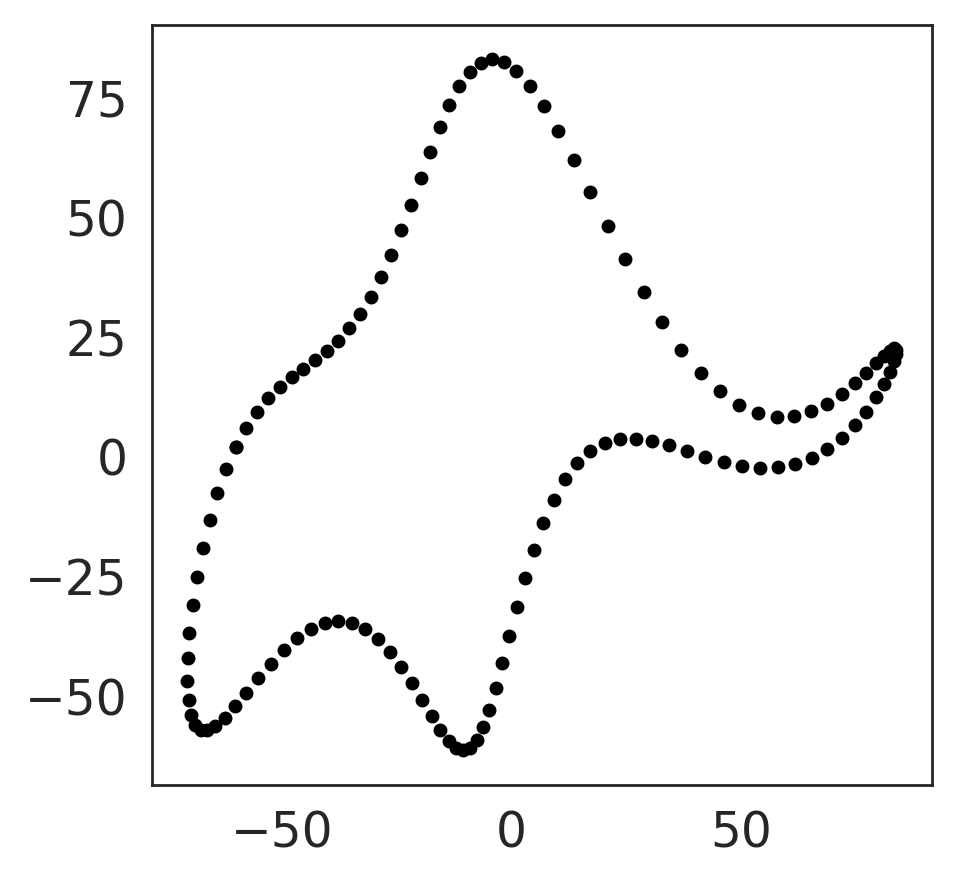

In [ ]:
# elephant parameters
batch_size = 128 #scaled_mat.shape[0]#3850 # 50

p1, p2, p3, p4 = (50 - 30j, 18 +  8j, 12 - 10j, -14 - 60j )
p5 = 40 + 20j # eyepiece

def fourier(t, C):
    f = np.zeros(t.shape)
    A, B = C.real, C.imag
    for k in range(len(C)):
        f = f + A[k]*np.cos(k*t) + B[k]*np.sin(k*t)
    return f

def elephant(t, p1, p2, p3, p4, p5):
    npar = 6
    Cx = np.zeros((npar,), dtype='complex')
    Cy = np.zeros((npar,), dtype='complex')

    Cx[1] = p1.real*1j
    Cx[2] = p2.real*1j
    Cx[3] = p3.real
    Cx[5] = p4.real

    Cy[1] = p4.imag + p1.imag*1j
    Cy[2] = p2.imag*1j
    Cy[3] = p3.imag*1j

    # x = np.append(fourier(t,Cx), [-p5.imag]) #[-p5.imag]
    # y = np.append(fourier(t,Cy), [p5.imag]) #[p5.imag]
    x = fourier(t,Cx)
    y = fourier(t,Cy)

    return x,y

x, y = elephant(np.linspace(0,2*np.pi,batch_size), p1, p2, p3, p4, p5)

#Make array input for dimension of shape 

y = y#0.04*y #.025  .025    .025
x = x#0.02*x #.015   .02     .015
# y = 0.02*y  
# x = 0.01*x

coords = np.array([list(y),list(-x)])

plt.plot(y,-x,'.',c='black')
plt.show()


In [ ]:
#Test with task assignment in-utero
el = []
elLab = []
elType = []

for i in range(rounds):
  nca = picasso(n_latent = 2, epochs = 1000, batch_size = batch_size)
  lossesEl, latentEl = nca.fit(scaled_mat,coords, fracNCA = 0.008,silent=True,ret_loss=True)

  el += [latentEl]
  elLab += ['Elephant']
  elType += ['MCML 2D']




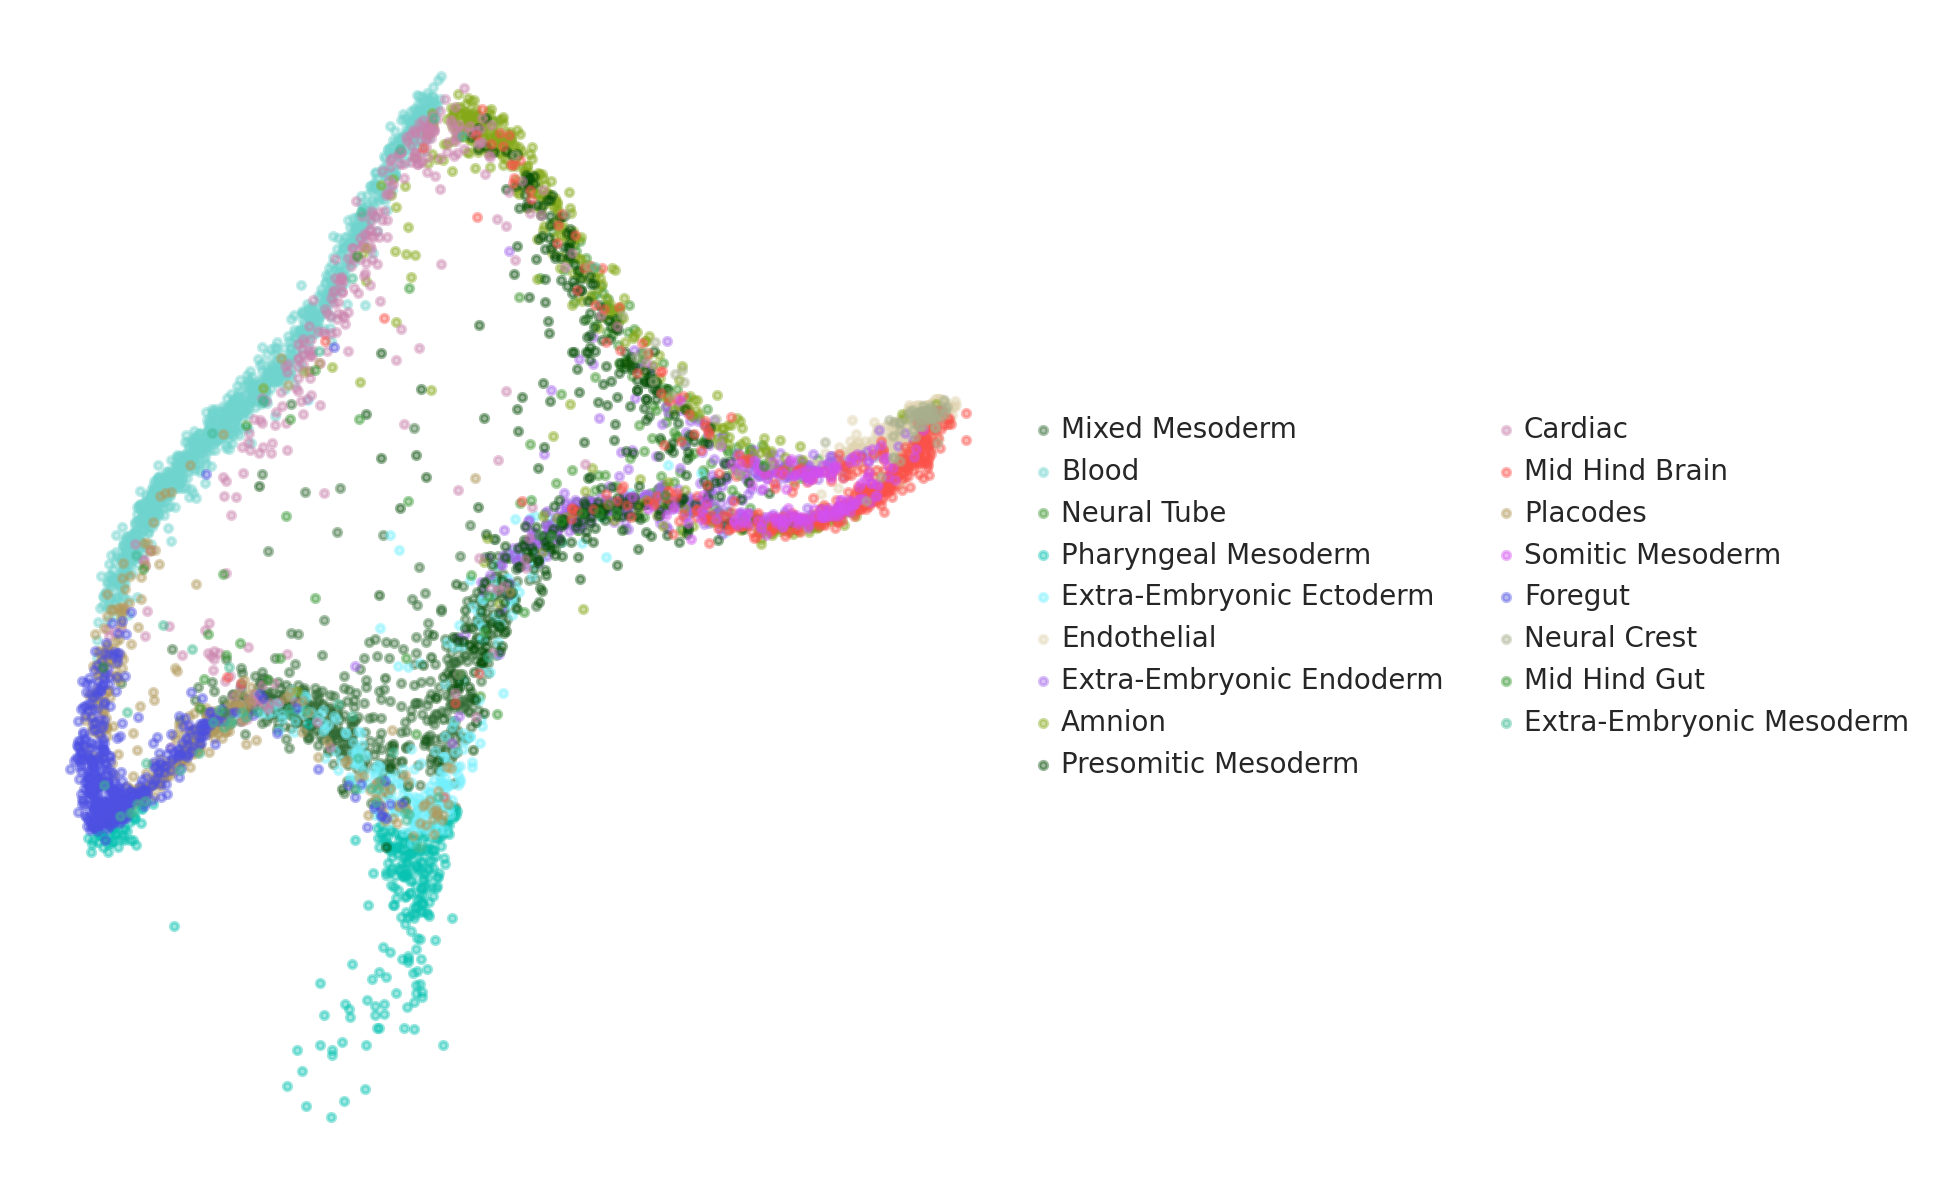

In [ ]:

vis.obj_plot_embed(el[2], np.array(fullNames), fname = '2DNCA.pdf', colors=colors,figsize=(8,5) ) 

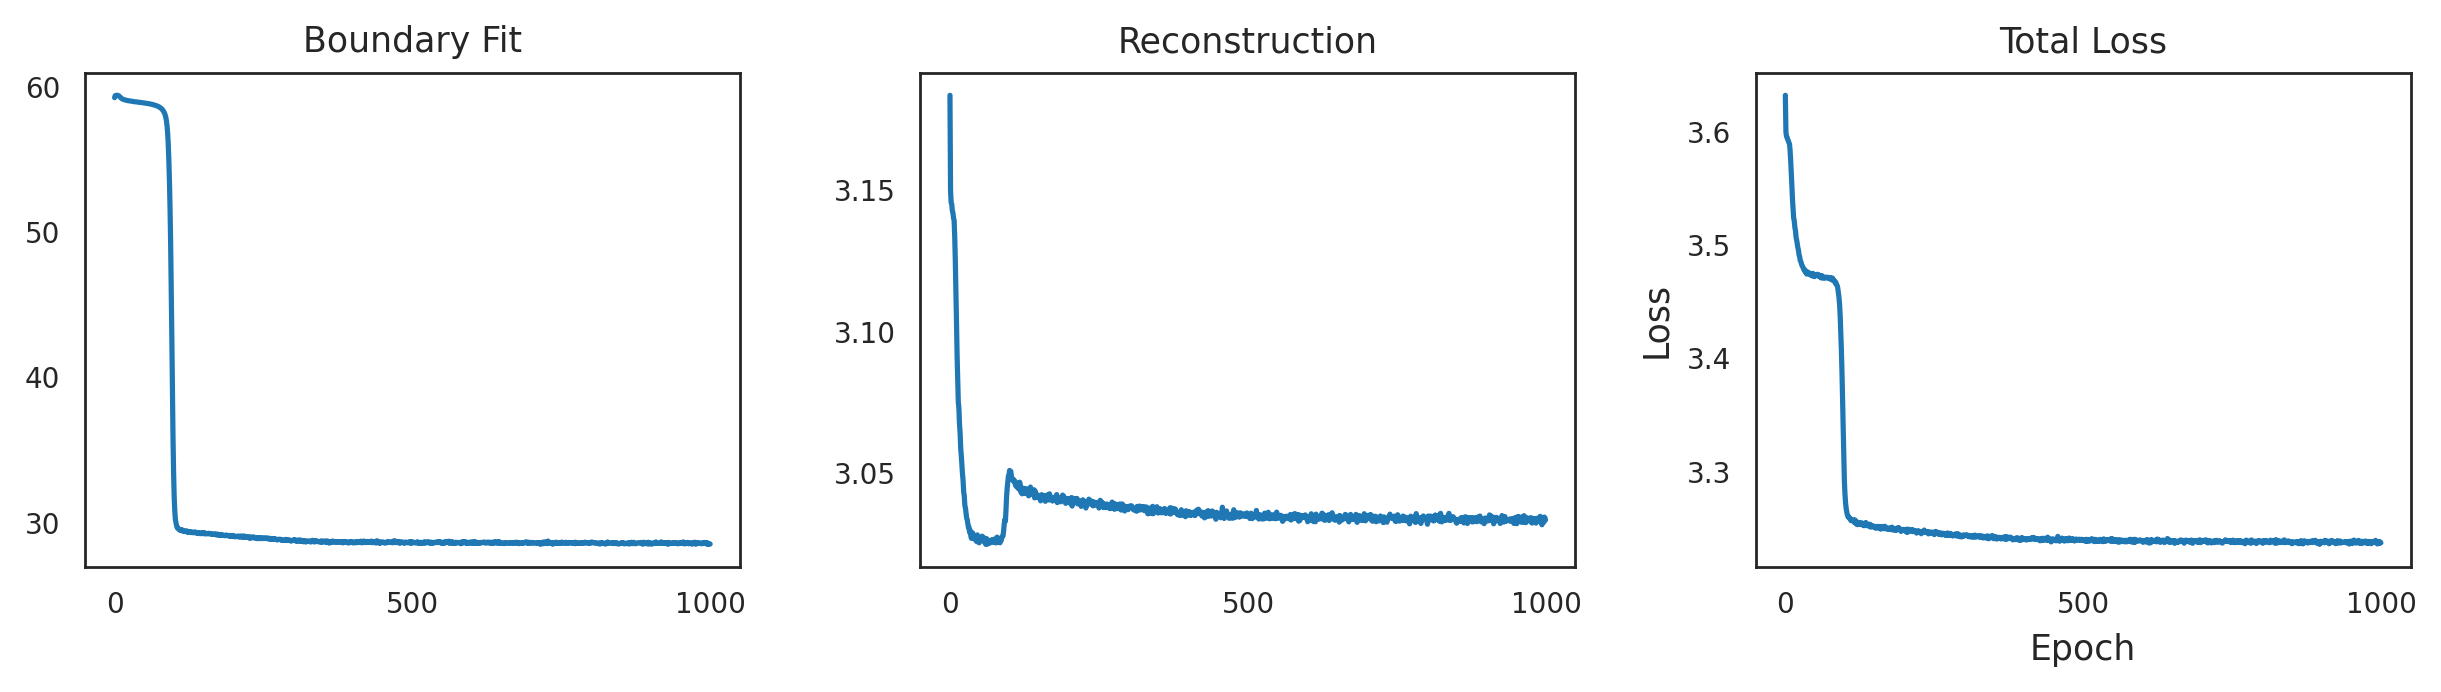

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

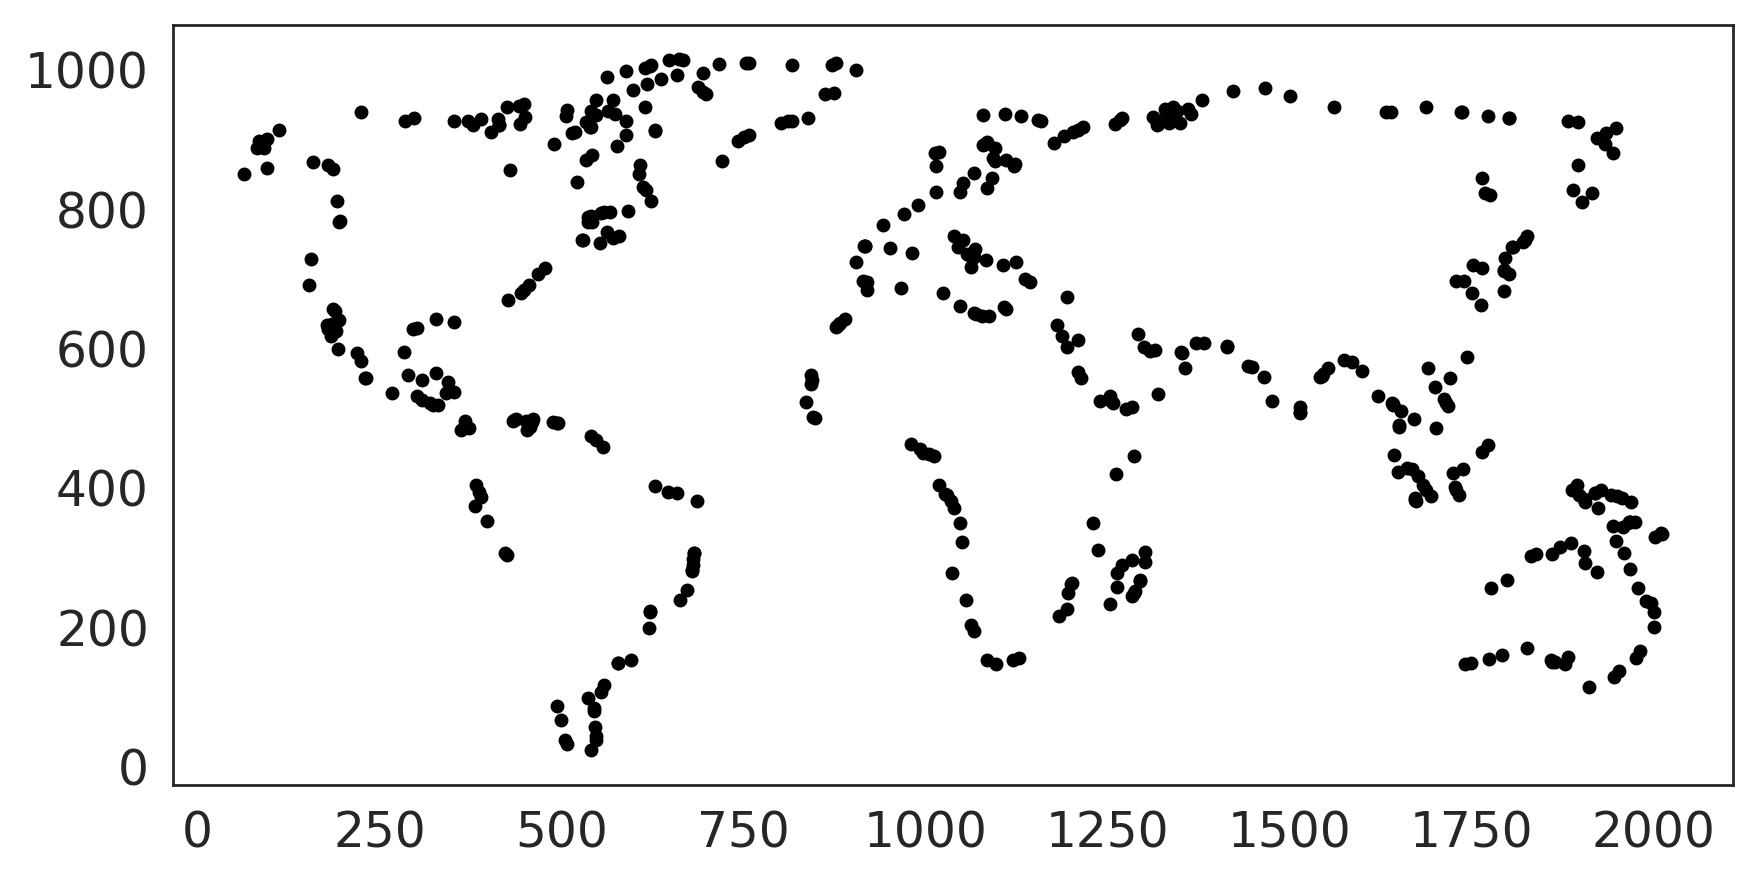

In [ ]:
# Map parameters
pts = pd.read_csv(data_path+'/mapPoints.csv',header=None)
pts.head()

x = pts[0]
y = pts[1]
coords = np.array([x,y])

plt.figure(figsize=(8,4))
plt.plot(x,y,'.',c='black')
plt.show()


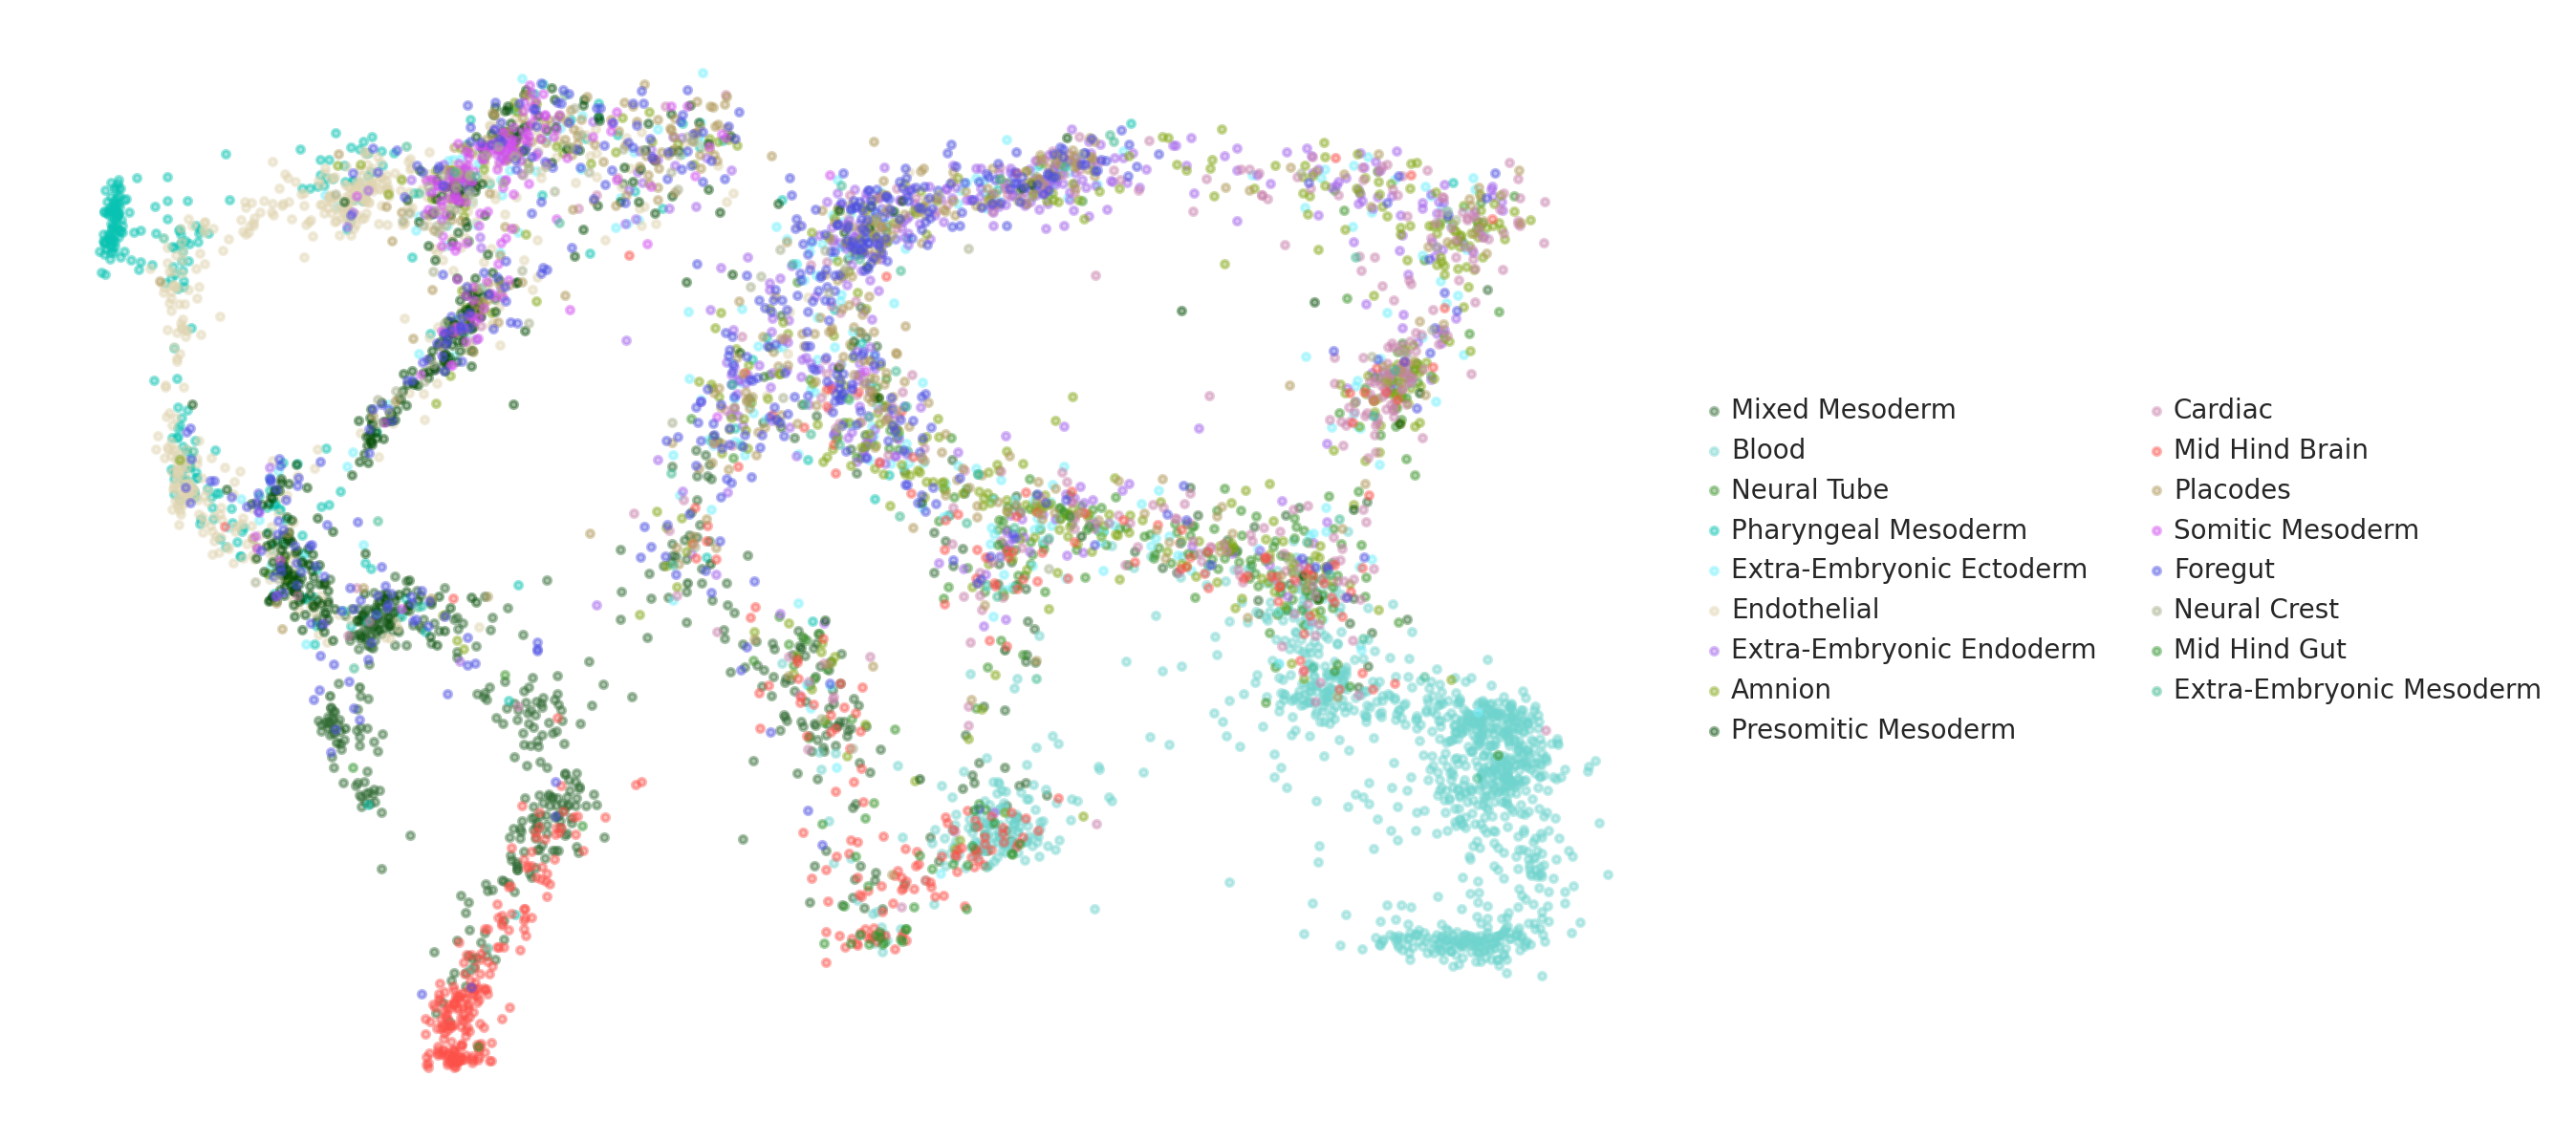

In [ ]:
#Test with task assignment 
batch_size = len(x)
rounds = 5

map = []
mapLab = []
mapType = []

for i in range(rounds):
  nca = picasso(n_latent = 2, epochs = 1000, batch_size = batch_size)
  lossesMap, latentMap = nca.fit(scaled_mat,coords, fracNCA = 0.95,silent=True,ret_loss=True)

  map += [latentMap]
  mapLab += ['Map']
  mapType += ['MCML 2D']


vis.obj_plot_embed(latentMap, np.array(fullNames), fname = '2DNCA.pdf', colors=colors,figsize=(11,5) )


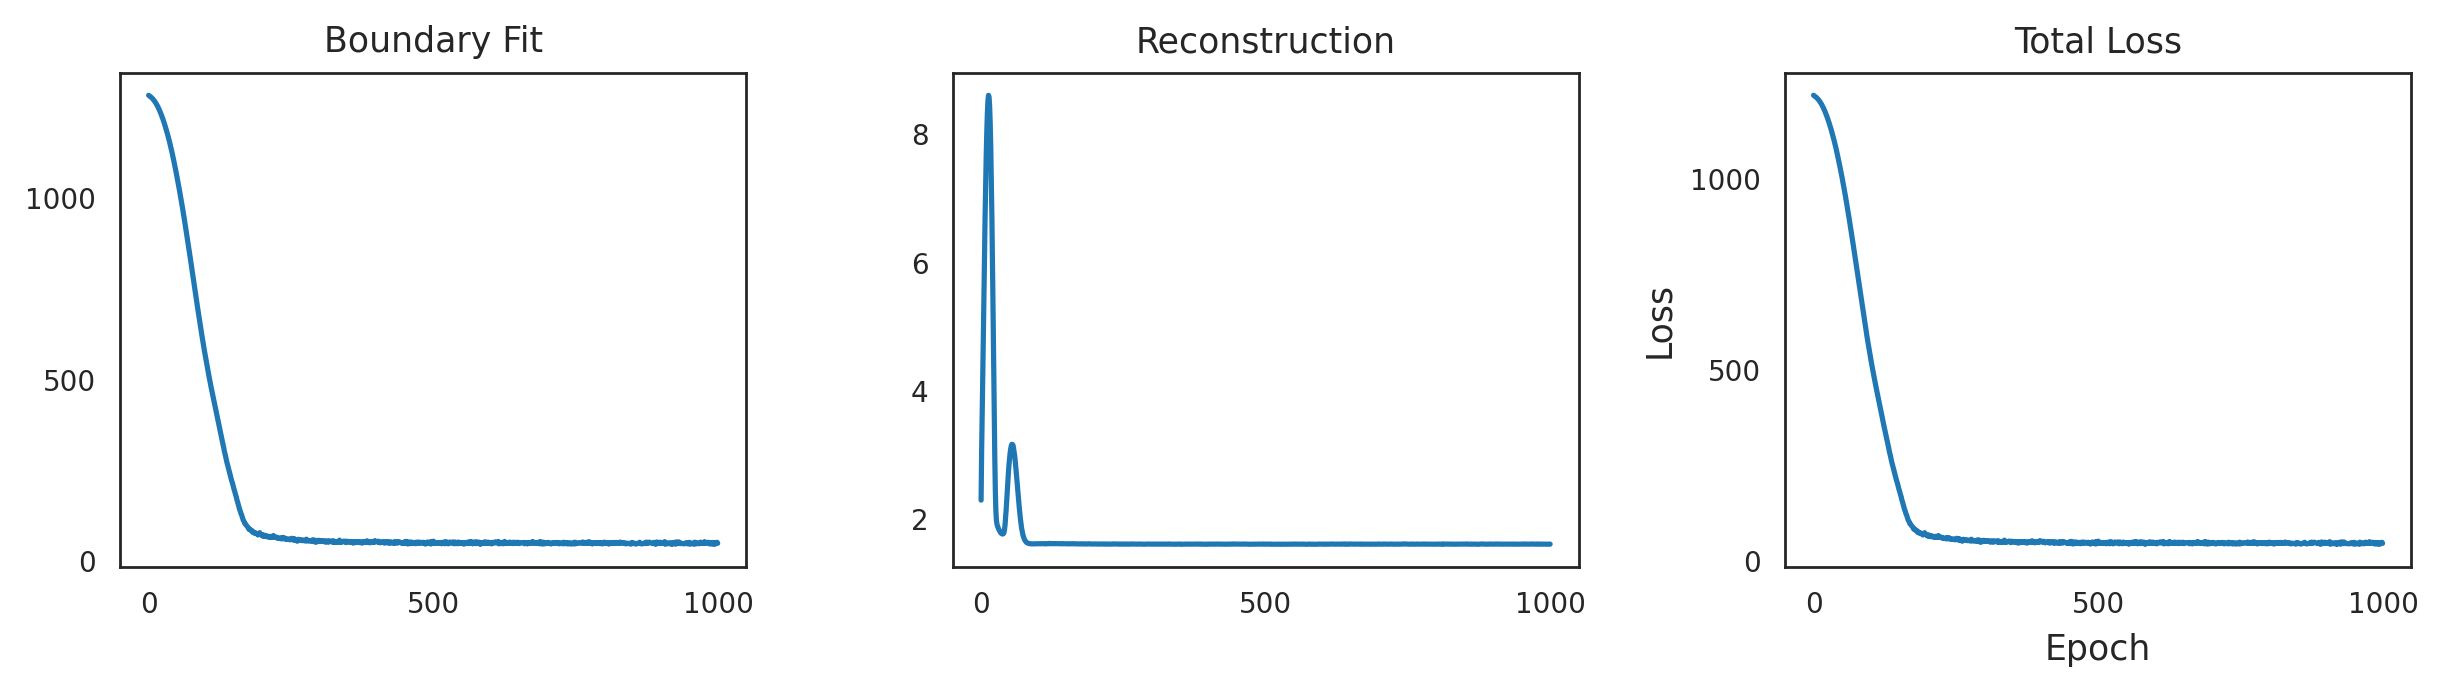

In [ ]:
nca.plotLosses(figsize=(10,3),axisFontSize=10,tickFontSize=8)

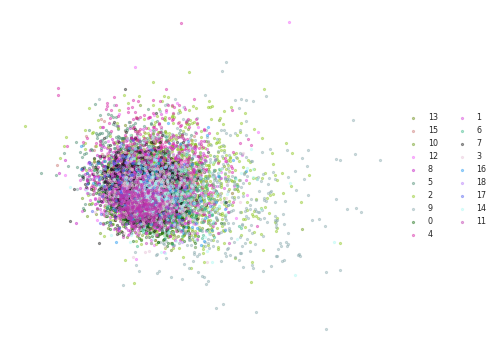

In [ ]:
# #No training
# ncaNoT = picasso(n_latent = 2, epochs = 0, batch_size = batch_size)
# lossesNoT, latentNoT = ncaNoT.fit(scaled_mat,coords, fracNCA = 1,silent=True,ret_loss=True)


# vis.obj_plot_embed(latentNoT, labs[0], fname = '2DNCA.pdf', colors=colors )


Get latent spaces for comparison (baselines)

In [ ]:
latents,latentLab,latentType = tl.visComp(scaled_mat, ndims=2, pcs=50)

Compare flower embedding

In [ ]:
latents = fl + latents

latentLab = flLab + latentLab

latentType = flType + latentType

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)


In [ ]:
allVals = allVals[~allVals['Latent'].isin(['PCA 50D','Elephant','Map'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

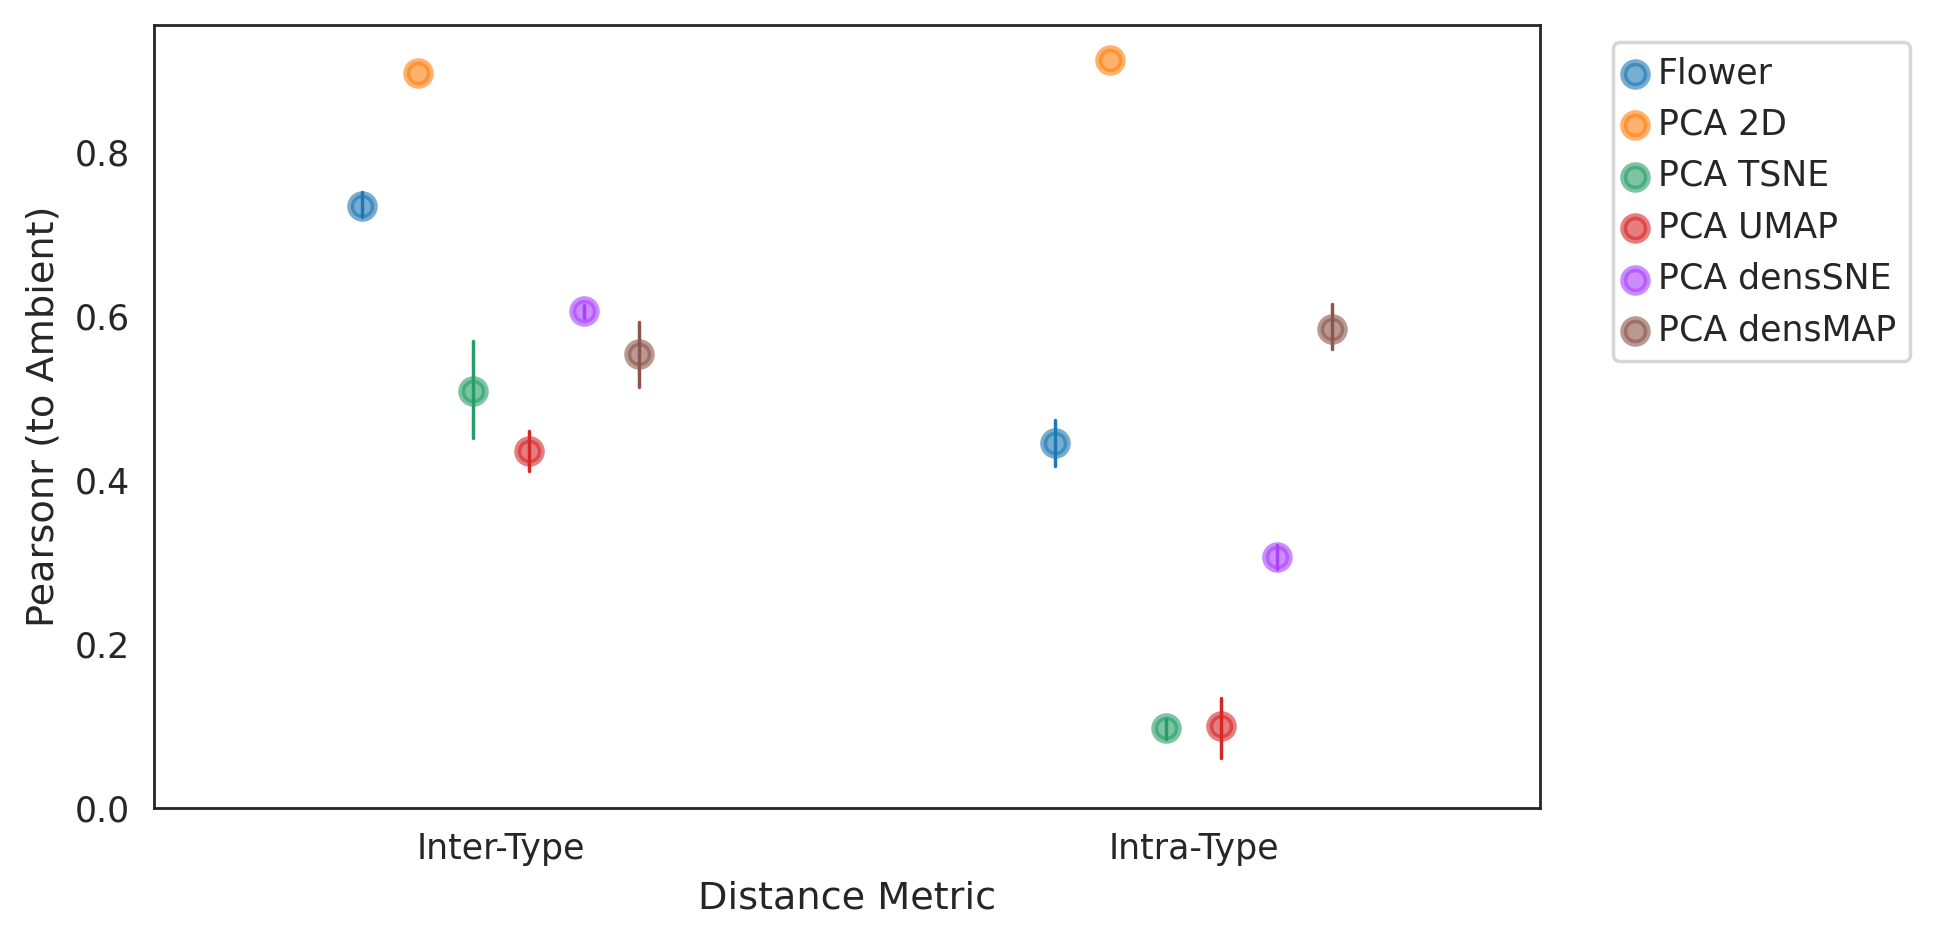

In [ ]:
vis.plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10, fname = None)

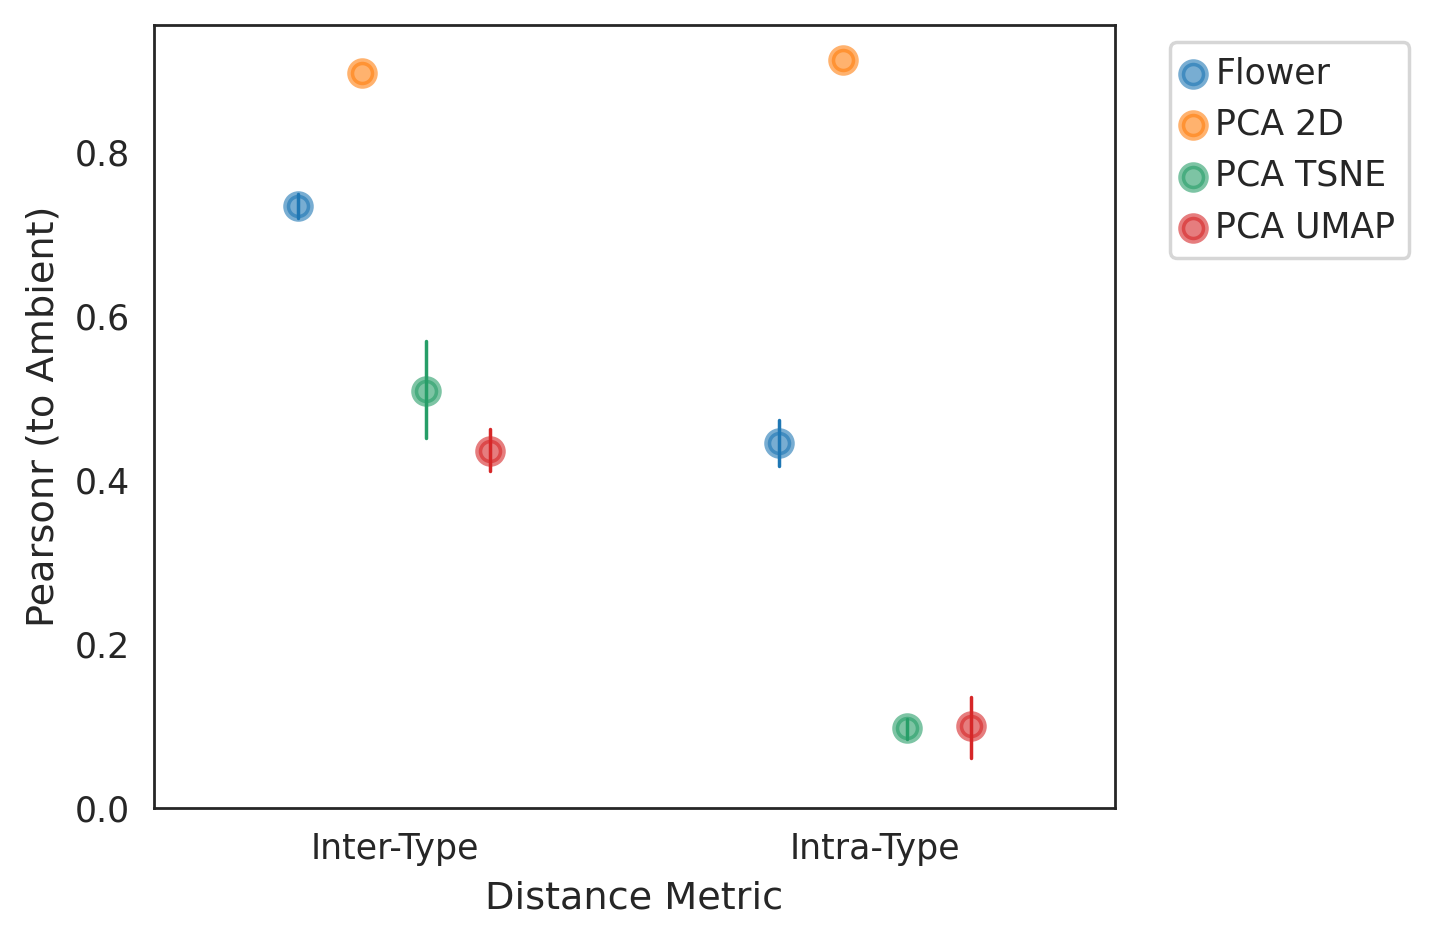

In [ ]:
vis.plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10, fname = None,figsize=(6,4))

Compare elephant embedding

In [ ]:
latents = el + latents

latentLab = elLab + latentLab

latentType = elType + latentType

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)
allVals = allVals[~allVals['Latent'].isin(['Flower','PCA 50D'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

In [ ]:
toRemove = ['Intra-Gender','Inter-Gender']
subDistAllVals = subAllVals[~subAllVals['Distance'].isin(toRemove)]

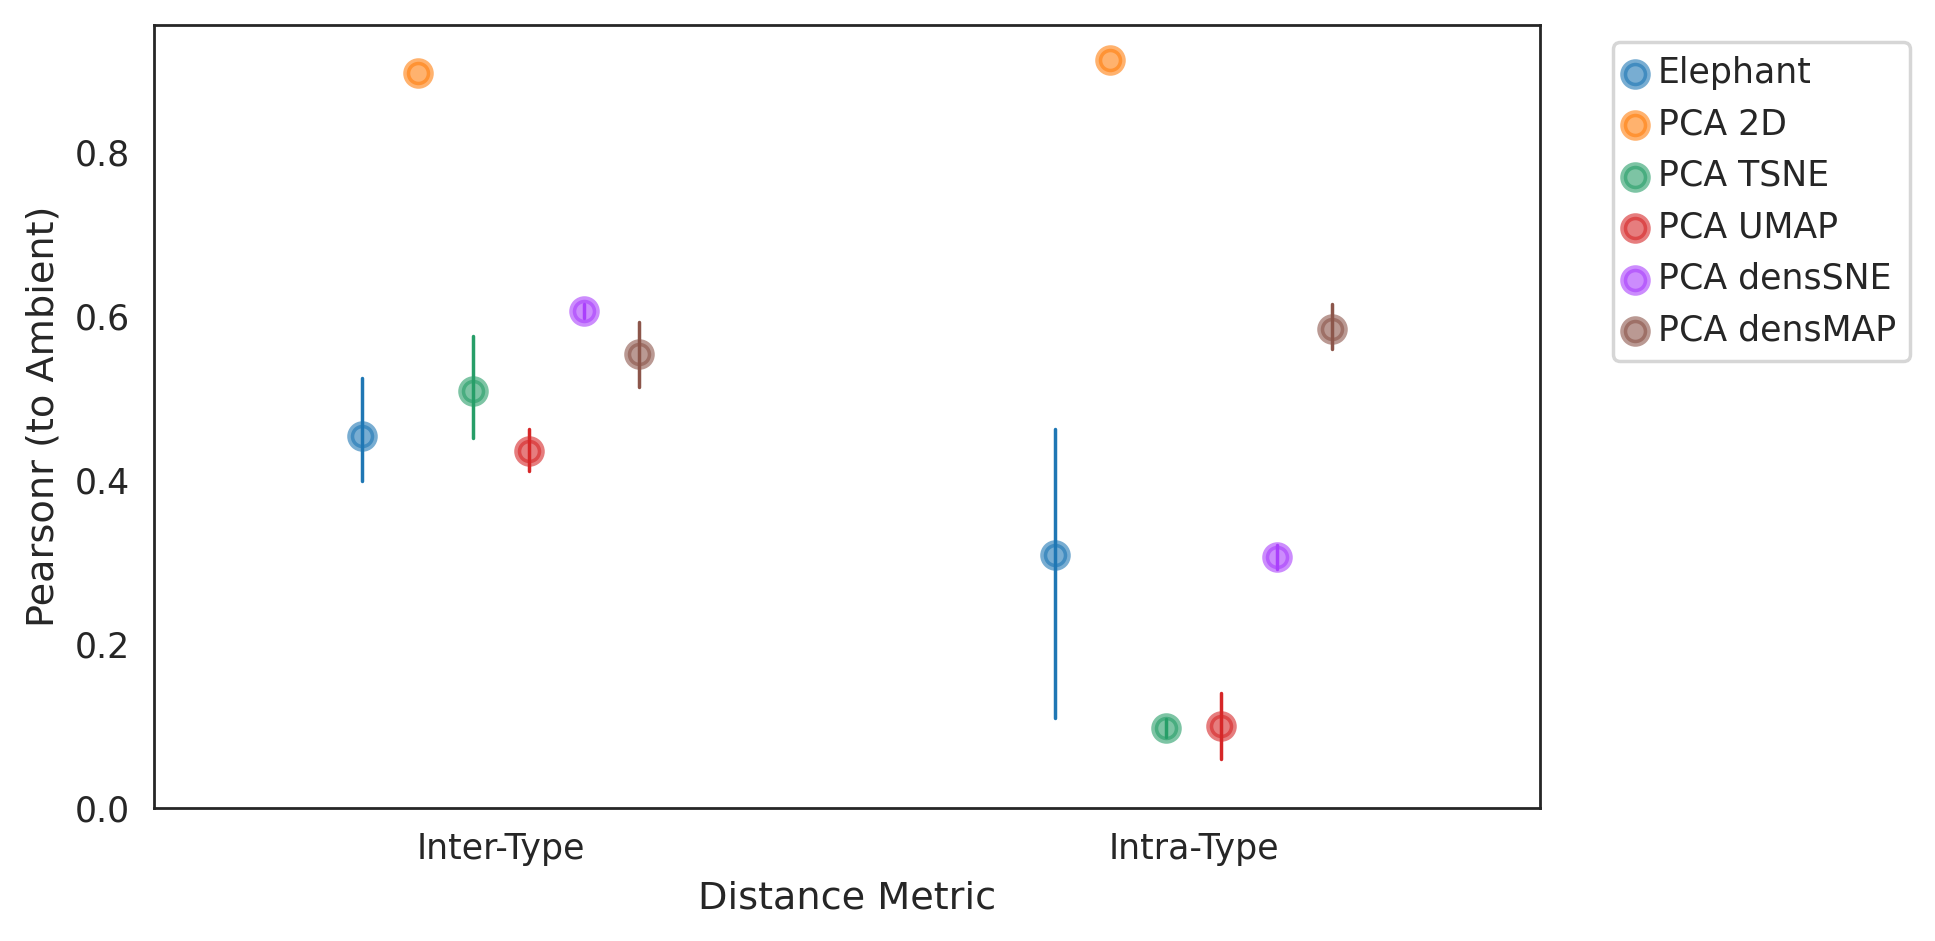

In [ ]:
vis.plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10, fname = None)

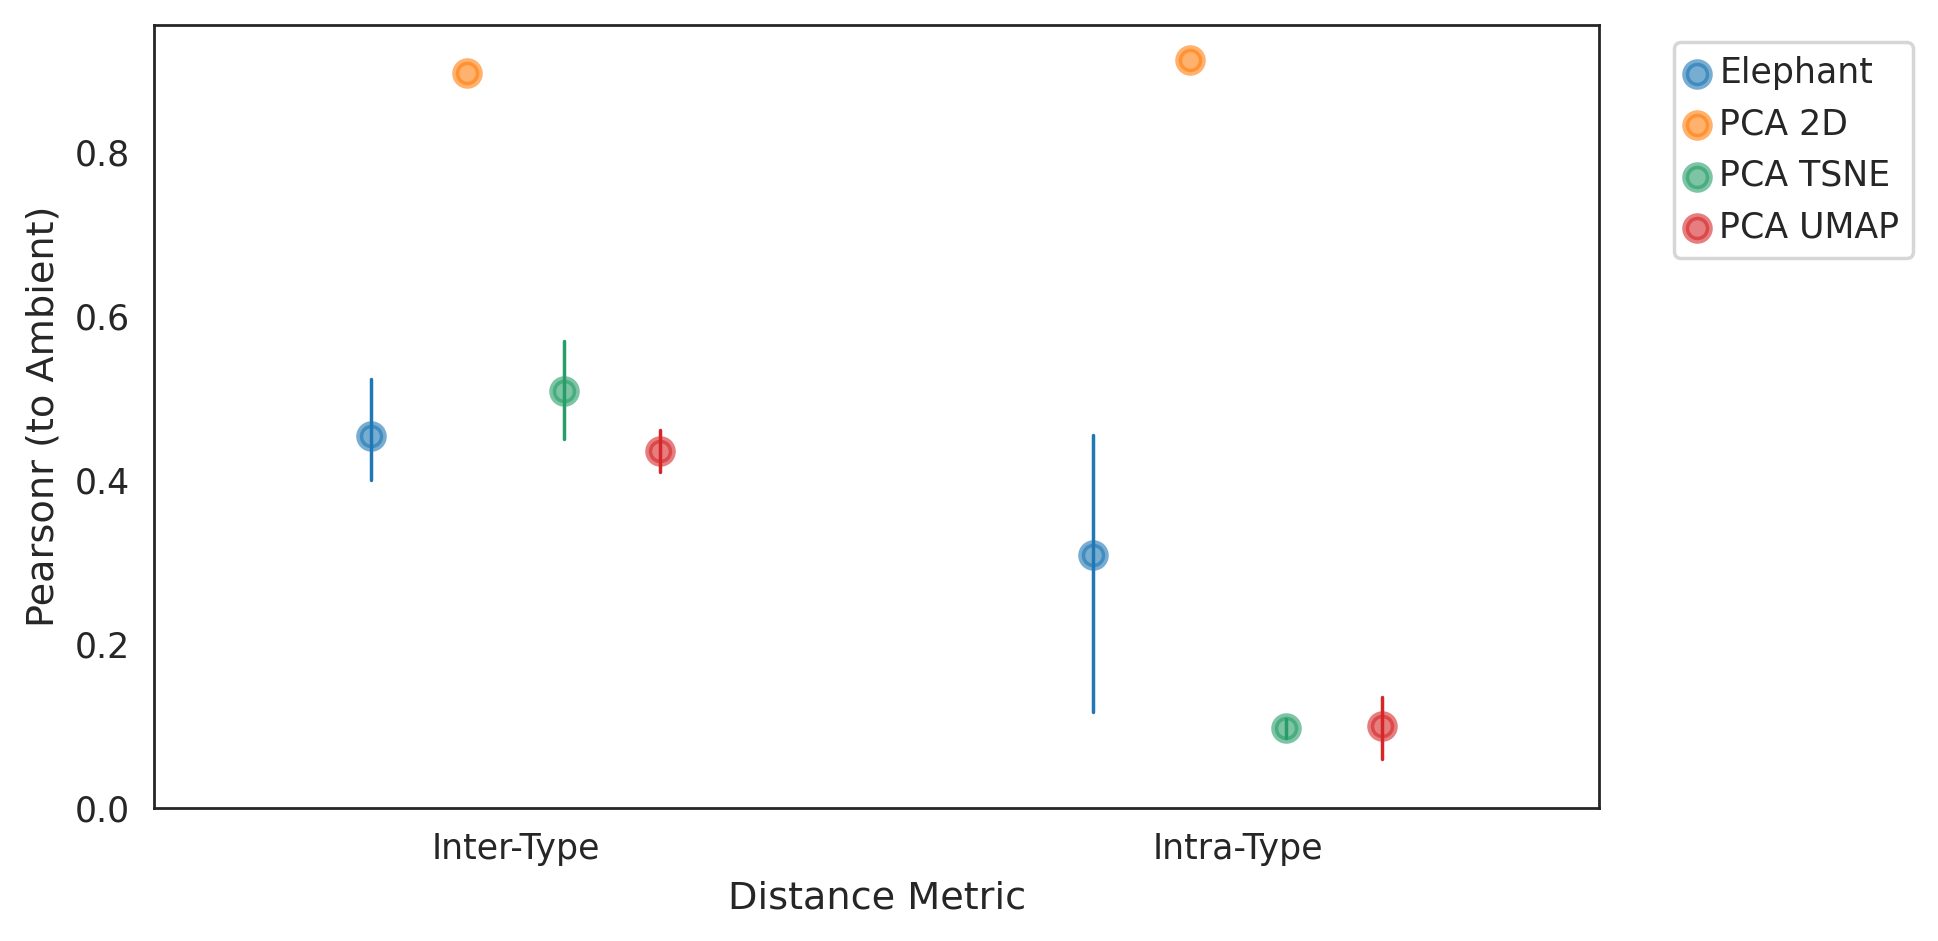

In [ ]:
vis.plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10, fname = None)

Compare map embedding

In [ ]:
latents = map + latents#[1:]

latentLab = mapLab + latentLab#[1:]

latentType = mapType + latentType#[1:]

In [ ]:
allVals = getAllVars(latents,latentLab,latentType)


from google.colab import files

allVals.to_csv('exUtElMapVals.csv')
files.download('exUtElMapVals.csv')


allVals = allVals[~allVals['Latent'].isin(['Elephant'])]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
allVals = allVals[~allVals['Latent'].isin(['PCA 50D','Flower'])]

In [ ]:
toRemove = ['Recon MCML denSNE','PCA densSNE','Recon MCML densMAP','PCA densMAP','PCA 50D']
subAllVals = allVals[~allVals['Latent'].isin(toRemove)]

In [ ]:
toRemove = ['Intra-Gender','Inter-Gender']
subDistAllVals = subAllVals[~subAllVals['Distance'].isin(toRemove)]

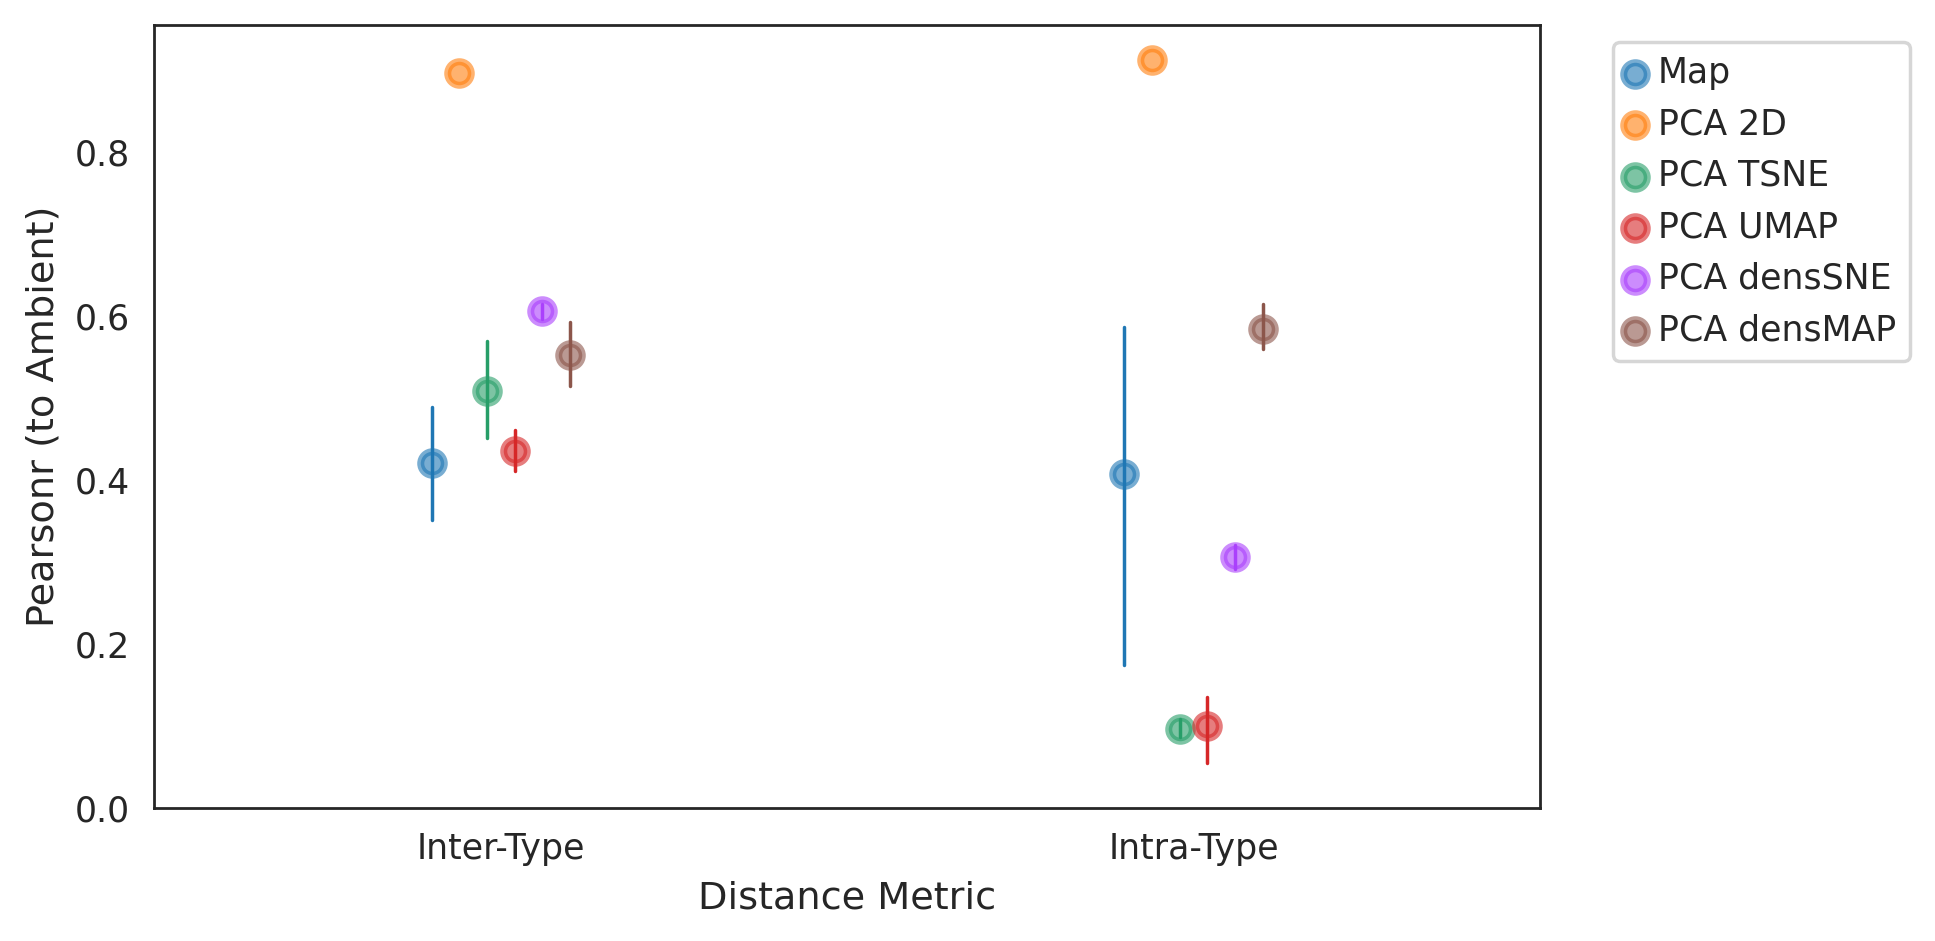

In [ ]:
vis.plotLatentStats(allVals, axisFontSize = 11, tickFontSize = 10, dodge=0.2) #0.95

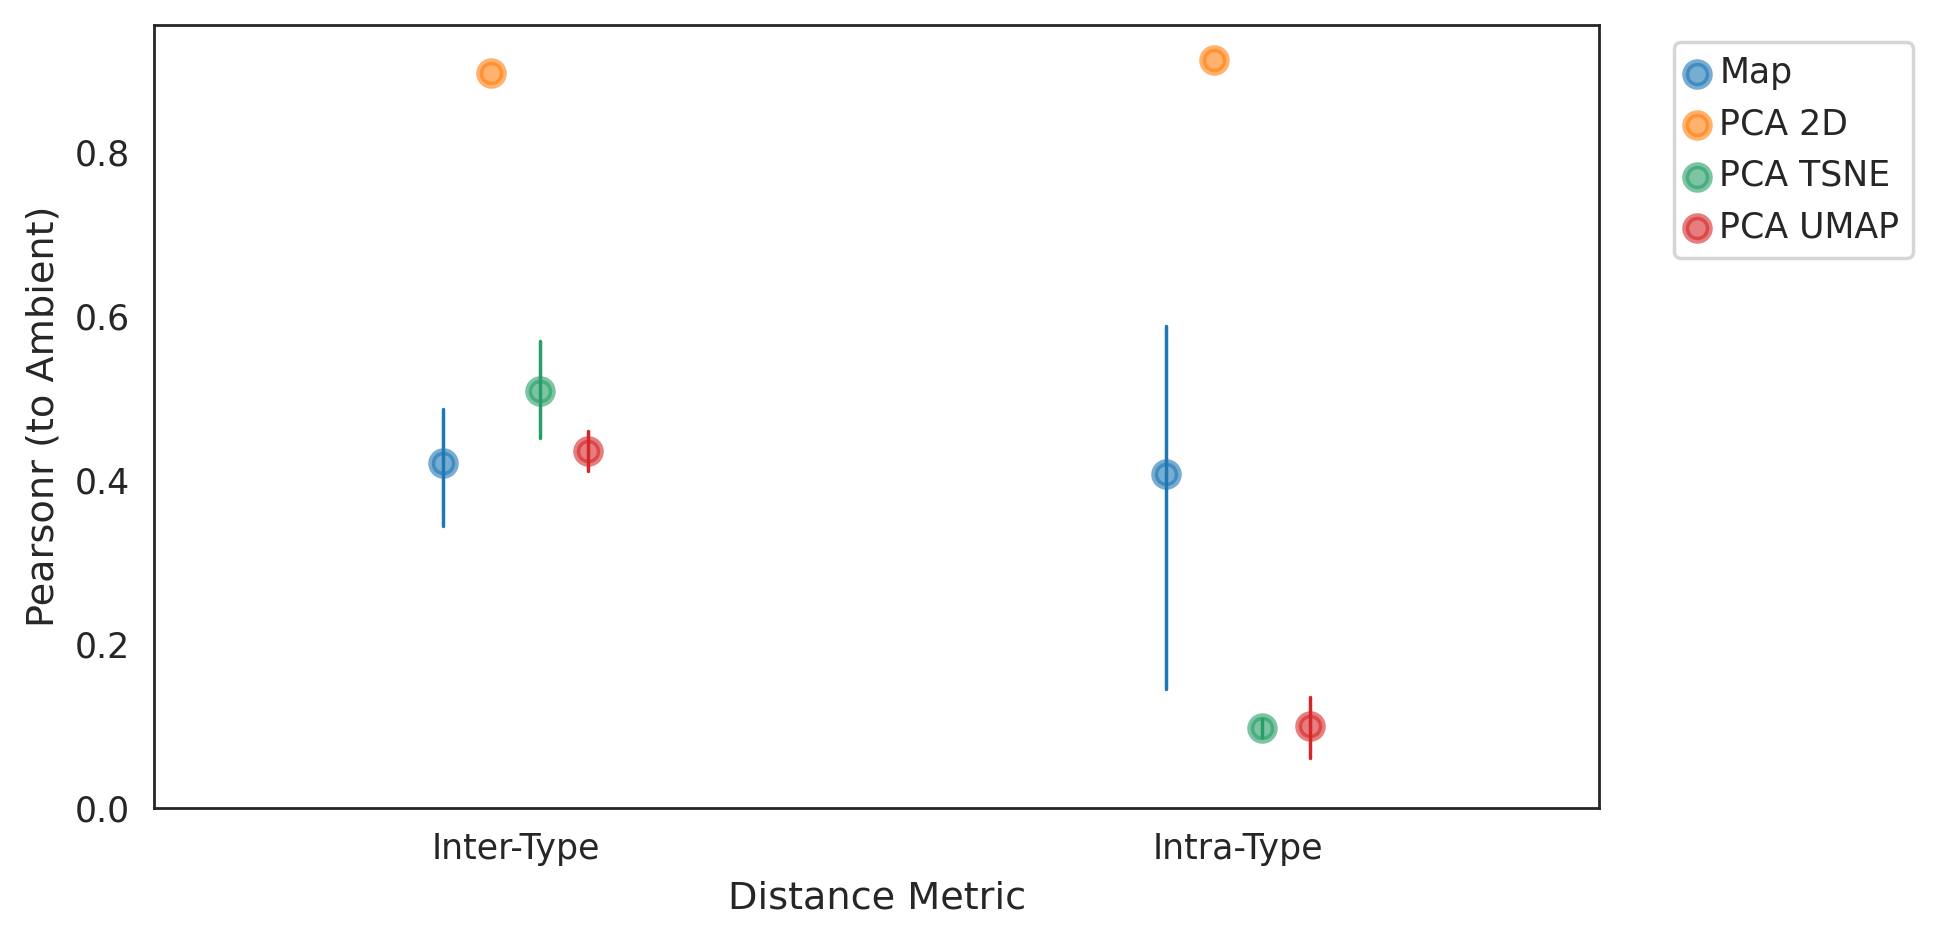

In [ ]:
vis.plotLatentStats(subAllVals, axisFontSize = 11, tickFontSize = 10, dodge=0.2)

**Compare KNNs to Ambient Space**
KNN matching is bad from the get go (PCA to 50D)

In [ ]:
orig_indices = tl.getNeighbors(count_mat, n_neigh = 10,p=1)

In [ ]:
knnDF = getAllKNNs(orig_indices,latents,latentLab,latentType)

In [ ]:
flowallVals = knnDF[~knnDF['Latent'].isin(['Elephant','Map'])]
elallVals = knnDF[~knnDF['Latent'].isin(['Flower','Map'])]
mapallVals = knnDF[~knnDF['Latent'].isin(['Flower','Elephant'])]

In [ ]:
axisFontSize = 11
tickFontSize = 10
errwidth=1
figsize =(8,4)

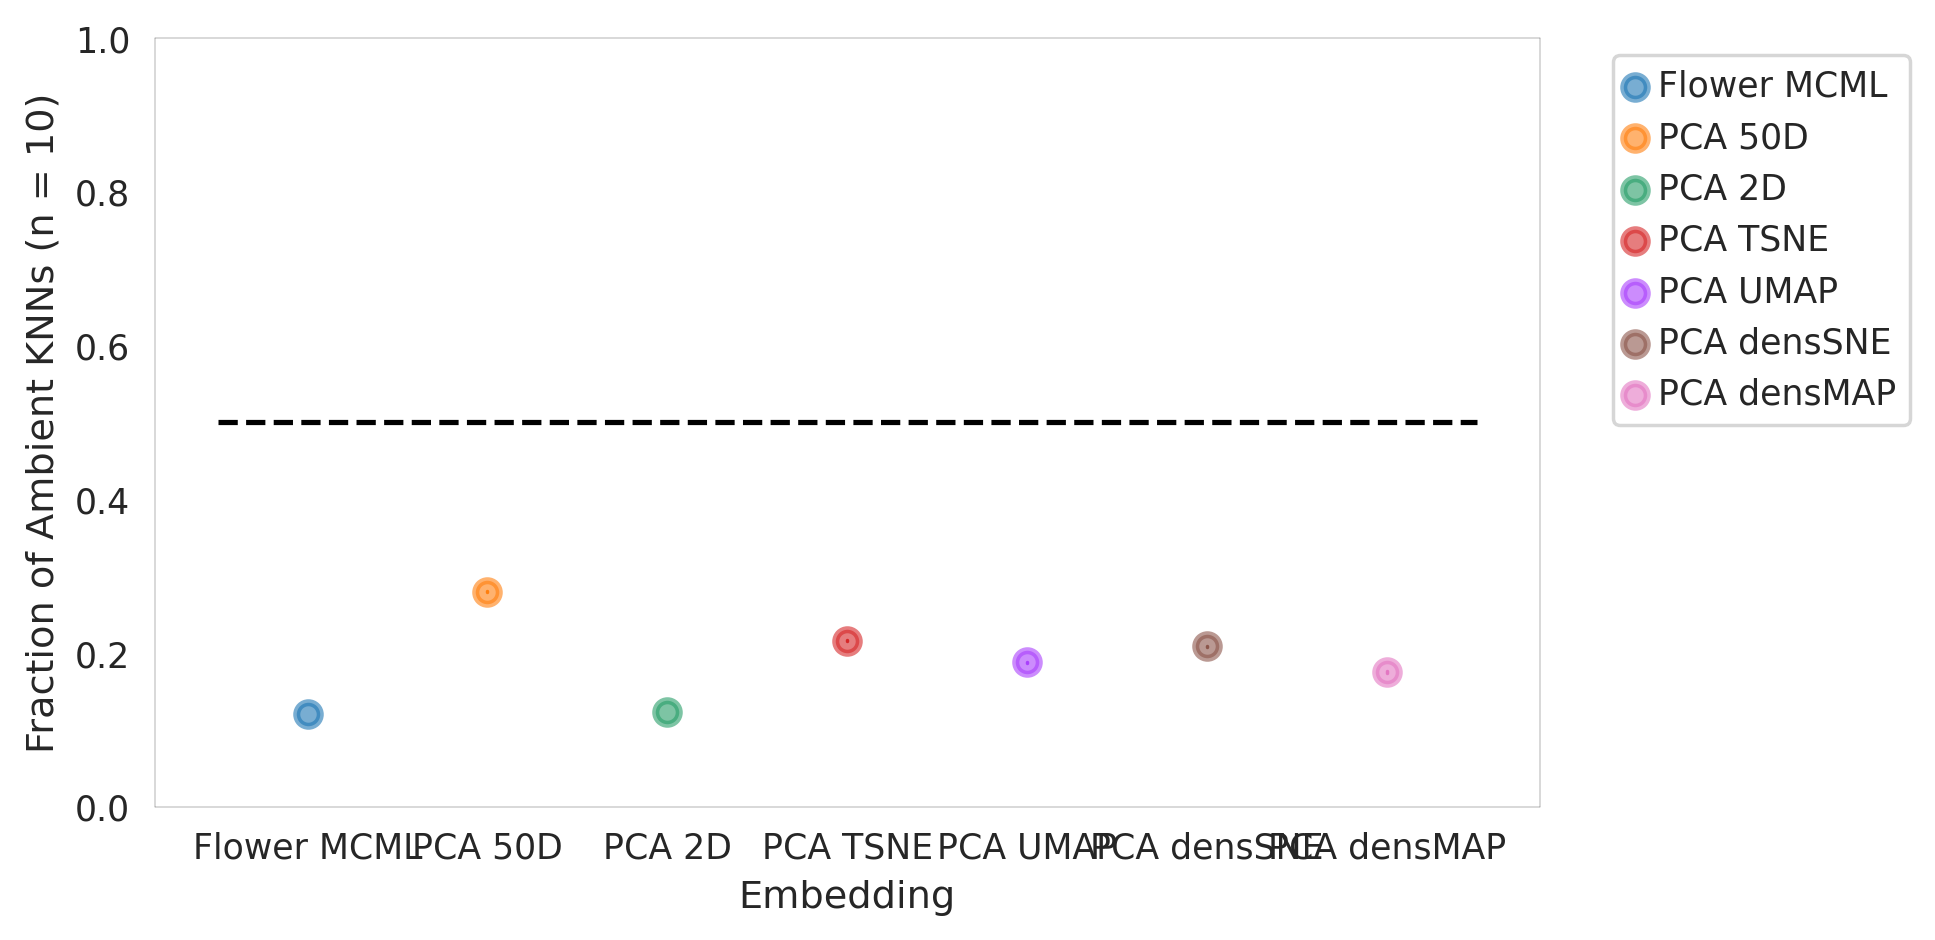

In [ ]:
plt.figure(figsize=figsize)
g=sns.pointplot(x='Latent', y='Fraction', data=flowallVals, hue='Latent', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=axisFontSize)
plt.ylabel("Fraction of Ambient KNNs (n = 10)",fontsize=axisFontSize)
plt.xticks(fontsize=tickFontSize)
plt.yticks(fontsize=tickFontSize)
plt.ylim(ymin=0,ymax=1)
plt.hlines([0.5],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()

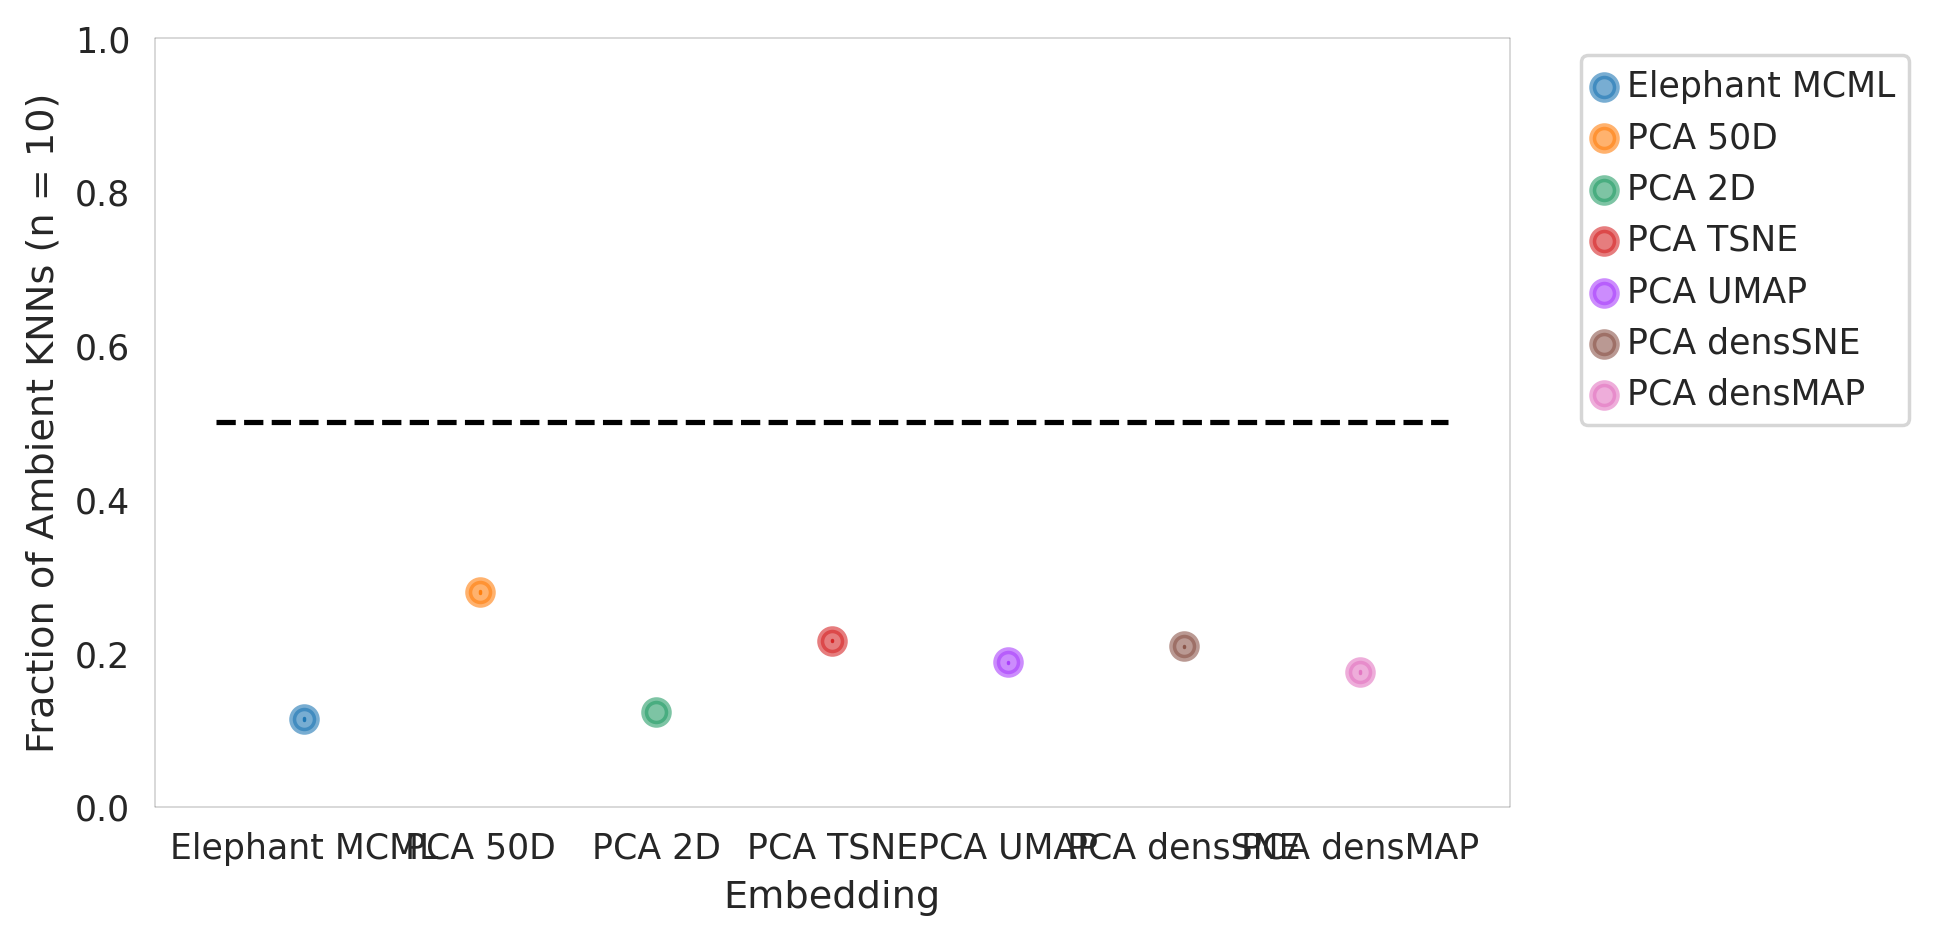

In [ ]:
plt.figure(figsize=figsize)
g=sns.pointplot(x='Latent', y='Fraction', data=elallVals, hue='Latent', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=axisFontSize)
plt.ylabel("Fraction of Ambient KNNs (n = 10)",fontsize=axisFontSize)
plt.xticks(fontsize=tickFontSize)
plt.yticks(fontsize=tickFontSize)
plt.ylim(ymin=0)
plt.ylim(ymin=0,ymax=1)
plt.hlines([0.5],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()

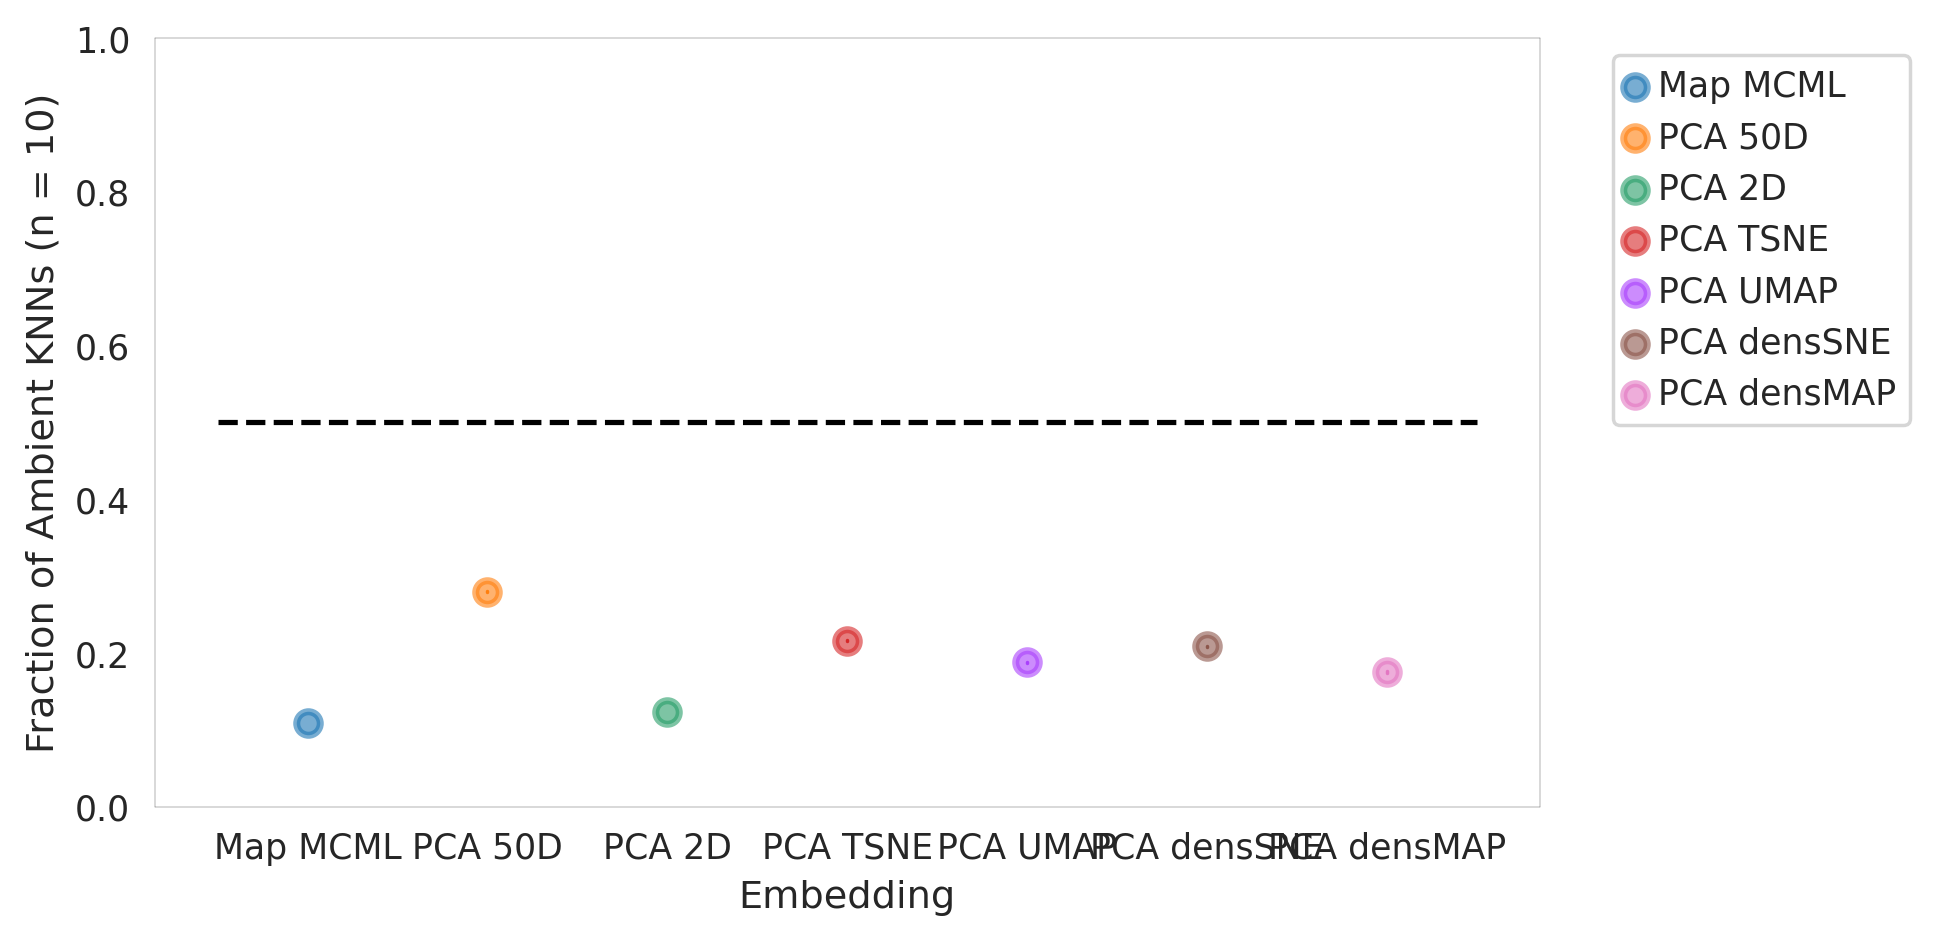

In [ ]:
plt.figure(figsize=figsize)
g=sns.pointplot(x='Latent', y='Fraction', data=mapallVals, hue='Latent', err_style='bars',join=False,plot_kws=dict(alpha=0.6),errwidth=errwidth)
plt.setp(g.collections, alpha=.6) #for the markers
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",prop={"size":10})


plt.xlabel("Embedding",fontsize=axisFontSize)
plt.ylabel("Fraction of Ambient KNNs (n = 10)",fontsize=axisFontSize)
plt.xticks(fontsize=tickFontSize)
plt.yticks(fontsize=tickFontSize)
plt.ylim(ymin=0,ymax=1)
plt.hlines([0.5],g.get_xlim()[0],g.get_xlim()[1], linestyles='dashed', colors='black')
plt.tight_layout()